In [434]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn
import math

#linear Regression
from sklearn import linear_model

#Feature Selection
from sklearn.feature_selection import RFECV

#KMeans Clustering
from sklearn import cluster

#Plot.ly
import plotly 
plotly.tools.set_credentials_file(username='ahmetkaymak', api_key='jEHfJe3oQvfhKPpSmILJ')
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.graph_objs as go

%matplotlib inline

In [435]:
#G20 Data

G20Countries=['ARG','AUS','BRA','CAN','CHN','FRA','DEU','IND','IDN','ITA','JPN','MEX','RUS','SAU','ZAF','KOR','TUR','GBR','USA',]
G20Columns=['Country Name','Country Code',2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013]
G20Ranking = pd.DataFrame(columns=G20Columns)
G20Ranking['Country Code']=G20Countries

In [436]:
#Turkey Data
ParameterColumns=['Ranking Parameter',2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013]
Parameters=      ['GDP',
                 'Health expenditure, total (% of GDP)',
                 'Health expenditure, public(% of Health Expenditure)',
                 'Improved sanitation facilities (%population access)',
                 'Improved water source (%population access)',
                 'Birth rate, crude (per 1,000 people)',
                 'Death rate, crude (per 1,000 people)',
                 'Fertility rate, total (births per woman)',
                 'Life expectancy at birth, total (years)',
                 'Maternal Mortaility Rate (per in 1000 infant)',
                 'CO2 Emission (kt)',
                 'GDP Group',
                 'Ranking Point',
                 'Ranking']
TurkeyData = pd.DataFrame(columns=ParameterColumns)
TurkeyData['Ranking Parameter']=Parameters

In [437]:
#G20 Average Data
G20AverageData = pd.DataFrame(columns=ParameterColumns)
G20AverageData['Ranking Parameter']=Parameters
G20AverageData = G20AverageData.fillna(value=0)

#OECD Average Data
OECDCountries = ['AUS','AUT','BEL','CAN','CHL','CZE','DNK','EST','FIN','FRA','DEU','GRC','HUN','ISL','IRL','ISL','ITA',
                 'JPN','KOR','LVA','LUX','MEX','NLD','NZL','NOR','POL','PRT','SVK','SVN','ESP','SWE','CHE','TUR','GBR','USA']

OECDAverageData = pd.DataFrame(columns=ParameterColumns)
OECDAverageData['Ranking Parameter']=Parameters
OECDAverageData = OECDAverageData.fillna(value=0)

In [438]:
#Data Reading CSV 

#Health Expenditure
healthExpenditure= pd.read_csv('C:/Users/SAMSUNG/Desktop/DataMiningProject/Health_Expenditure_1995_2015.csv')
healthExpenditure.drop('Series Code', axis=1, inplace=True)
countryFrame = healthExpenditure.ix[0:,1:3]
healthExpenditure=healthExpenditure.ix[0:,8:]
healthExpenditure.dropna(thresh=5) 

#GDP
gdp= pd.read_csv('C:/Users/SAMSUNG/Desktop/DataMiningProject/GDP_1995_2015.csv')
gdp.drop('Series Code', axis=1, inplace=True)
gdp=gdp.ix[0:,8:]

#Health Expenditure on Public
healthExpenditurePublic= pd.read_csv('C:/Users/SAMSUNG/Desktop/DataMiningProject/Health Expenditure Public.csv')
healthExpenditurePublic.drop('Series Code', axis=1, inplace=True)
healthExpenditurePublic=healthExpenditurePublic.ix[0:,3:]

#Improved Sanitation
improvedSanitation= pd.read_csv('C:/Users/SAMSUNG/Desktop/DataMiningProject/Improved_Sanitation_Acces_1995_2015.csv')
improvedSanitation.drop('Series Code', axis=1, inplace=True)
improvedSanitation=improvedSanitation.ix[0:,8:]

#Improved Water Access
improvedWaterAccess= pd.read_csv('C:/Users/SAMSUNG/Desktop/DataMiningProject/Improved_Water_Access_1995_2015.csv')
improvedWaterAccess.drop('Series Code', axis=1, inplace=True)
improvedWaterAccess=improvedWaterAccess.ix[0:,8:]

#Birth Date
birthRate= pd.read_csv('C:/Users/SAMSUNG/Desktop/DataMiningProject/Birth_Rate_1995_2015.csv')
birthRate.drop('Series Code', axis=1, inplace=True)
birthRate=birthRate.ix[0:,8:]

#Death Rate
deathRate= pd.read_csv('C:/Users/SAMSUNG/Desktop/DataMiningProject/Death_Rate_1995_2015.csv')
deathRate.drop('Series Code', axis=1, inplace=True)
deathRate=deathRate.ix[0:,8:]

#Fertility Rate
fertilityRate= pd.read_csv('C:/Users/SAMSUNG/Desktop/DataMiningProject/Fertility_Rate_1995_2015.csv')
fertilityRate.drop('Series Code', axis=1, inplace=True)
fertilityRate=fertilityRate.ix[0:,8:]

#Life Expectency
lifeExpectency= pd.read_csv('C:/Users/SAMSUNG/Desktop/DataMiningProject/Life_Expectency_1995_2015.csv')
lifeExpectency.drop('Series Code', axis=1, inplace=True)
lifeExpectency=lifeExpectency.ix[0:,8:]

#MaternalMortality
maternalMortality= pd.read_csv('C:/Users/SAMSUNG/Desktop/DataMiningProject/Maternal Mortality Ratio.csv')
maternalMortality.drop('Series Code', axis=1, inplace=True)
maternalMortality=maternalMortality.ix[0:,3:]

#CO2 Emission
CO2Emission= pd.read_csv('C:/Users/SAMSUNG/Desktop/DataMiningProject/CO2 Emission (kt).csv')
CO2Emission.drop('Series Code', axis=1, inplace=True)
CO2Emission=CO2Emission.ix[0:,3:]

print()

In [439]:
#----------------------------------------------2000 Data is ready-------------------------------------------------------

data2000 = countryFrame
data2000['GDP']=gdp.ix[0:,0]
data2000['Health expenditure, total (% of GDP)']=healthExpenditure.ix[0:,0]
data2000['Health expenditure, public(% of Health Expenditure)']=healthExpenditurePublic.ix[0:,0]
data2000['Improved sanitation facilities (%population access)']=improvedSanitation.ix[0:,0]
data2000['Improved water source (%population access)']=improvedWaterAccess.ix[0:,0]
data2000['Birth rate, crude (per 1,000 people)']=birthRate.ix[0:,0]
data2000['Death rate, crude (per 1,000 people)']=deathRate.ix[0:,0]
data2000['Fertility rate, total (births per woman)']=fertilityRate.ix[0:,0]
data2000['Life expectancy at birth, total (years)']=lifeExpectency.ix[0:,0]
data2000['Maternal Mortaility Rate (per in 1000 infant)']=maternalMortality.ix[0:,0]
data2000['CO2 Emission (kt)']=CO2Emission.ix[0:,0]

#2000 Reduction of Nan featured rows/countries
data2000=data2000.dropna(how='any')
data2000=data2000.reset_index(drop=True)

#2000 Data GDP quantization into 20 bins
gdp2000bins=data2000['GDP'].quantile([0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1])
data2000['GDP Group'] = pd.cut(data2000['GDP'].fillna(data2000['GDP'].mean()), gdp2000bins,labels=False)
data2000['GDP Group'] = data2000['GDP Group'].fillna(value=0,axis=0)
data2000.index= range(len(data2000))

columns_for_normalization = list(data2000.columns)[3:]

#Normalized Data
normalizedata2000=data2000.copy();
normalizedata2000[columns_for_normalization] = normalizedata2000[columns_for_normalization].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
normalizedata2000 = normalizedata2000.fillna(normalizedata2000.mean())

#2000 Data K-Means Clustering
km2000 = cluster.KMeans(n_clusters=5, n_jobs=1, precompute_distances='auto', random_state=None).fit(normalizedata2000.ix[0:,3:].fillna(normalizedata2000.mean()))
lb2000 = km2000.labels_
cn2000 = km2000.cluster_centers_
data2000['Ranking Group']=lb2000
data2000['Ranking Point']=lb2000

ranking2000 = normalizedata2000.ix[0:,:].fillna(normalizedata2000.mean()).copy();
for i in range(len(ranking2000)):
    ranking2000.ix[i,8]=1-ranking2000.ix[i,8]
    ranking2000.ix[i,11]=1-ranking2000.ix[i,11]
    ranking2000.ix[i,12]=1-ranking2000.ix[i,12]

ranking2000['Ranking Point']=0
ranking2000.ix[:,3]=ranking2000.ix[:,3]*ranking2000.ix[:,13]*10 #Health expenditure, total (% of GDP)
ranking2000.ix[:,4]=ranking2000.ix[:,4]*ranking2000.ix[:,13]*10 #Health expenditure, public(% of Health Expenditure)
ranking2000.ix[:,5]=ranking2000.ix[:,5]*15#Improved sanitation facilities (%population access)
ranking2000.ix[:,6]=ranking2000.ix[:,6]*10 #Improved water source (%population access)
ranking2000.ix[:,7]=ranking2000.ix[:,7]*5 #Birth rate, crude (per 1,000 people)
ranking2000.ix[:,8]=ranking2000.ix[:,8]*10 #Death rate, crude (per 1,000 people)
ranking2000.ix[:,9]=ranking2000.ix[:,9]*5 #Fertility rate, total (births per woman)
ranking2000.ix[:,10]=ranking2000.ix[:,10]*20 #Life expectancy at birth, total (years)
ranking2000.ix[:,11]=ranking2000.ix[:,11]*10 #Maternal Mortaility Rate (per in 1000 infant)
ranking2000.ix[:,12]=ranking2000.ix[:,12]*5 #CO2 Emission (kt)
data2000['Ranking Point']=ranking2000.ix[:,3]+ranking2000.ix[:,4]+ranking2000.ix[:,5]+ranking2000.ix[:,6]+ranking2000.ix[:,7]+ranking2000.ix[:,8]+ranking2000.ix[:,9]+ranking2000.ix[:,10]+ranking2000.ix[:,11]+ranking2000.ix[:,12]
data2000=data2000.sort_values(by='Ranking Point', ascending=False)
data2000.index= range(len(data2000))

for i in range(len(G20Ranking)):
    for j in range(len(data2000)):
        if(G20Ranking.ix[i,1]==data2000.ix[j,1]):
            G20Ranking.ix[i,['Country Name']]=data2000.ix[j,['Country Name']]
            G20Ranking.ix[i,2]=j+1
            G20AverageData.ix[0,1]+=data2000.ix[j,2]
            G20AverageData.ix[1,1]+=data2000.ix[j,3]
            G20AverageData.ix[2,1]+=data2000.ix[j,4]
            G20AverageData.ix[3,1]+=data2000.ix[j,5]
            G20AverageData.ix[4,1]+=data2000.ix[j,6]
            G20AverageData.ix[5,1]+=data2000.ix[j,7]
            G20AverageData.ix[6,1]+=data2000.ix[j,8]
            G20AverageData.ix[7,1]+=data2000.ix[j,9]
            G20AverageData.ix[8,1]+=data2000.ix[j,10]
            G20AverageData.ix[9,1]+=data2000.ix[j,11]
            G20AverageData.ix[10,1]+=data2000.ix[j,12]
            break
        if(data2000.ix[j,1]=='TUR'):
            TurkeyData.ix[0,1]=data2000.ix[j,2]
            TurkeyData.ix[1,1]=data2000.ix[j,3]
            TurkeyData.ix[2,1]=data2000.ix[j,4]
            TurkeyData.ix[3,1]=data2000.ix[j,5]
            TurkeyData.ix[4,1]=data2000.ix[j,6]
            TurkeyData.ix[5,1]=data2000.ix[j,7]
            TurkeyData.ix[6,1]=data2000.ix[j,8]
            TurkeyData.ix[7,1]=data2000.ix[j,9]
            TurkeyData.ix[8,1]=data2000.ix[j,10]
            TurkeyData.ix[9,1]=data2000.ix[j,11]
            TurkeyData.ix[10,1]=data2000.ix[j,12] 
            TurkeyData.ix[11,1]=data2000.ix[j,13]
            TurkeyData.ix[12,1]=data2000.ix[j,15]
            TurkeyData.ix[13,1]=j+1

for i in range(len(OECDCountries)):
    for j in range(len(data2000)):
        if(OECDCountries[i]==data2000.ix[j,1]):
            OECDAverageData.ix[0,1]+=data2000.ix[j,2]
            OECDAverageData.ix[1,1]+=data2000.ix[j,3]
            OECDAverageData.ix[2,1]+=data2000.ix[j,4]
            OECDAverageData.ix[3,1]+=data2000.ix[j,5]
            OECDAverageData.ix[4,1]+=data2000.ix[j,6]
            OECDAverageData.ix[5,1]+=data2000.ix[j,7]
            OECDAverageData.ix[6,1]+=data2000.ix[j,8]
            OECDAverageData.ix[7,1]+=data2000.ix[j,9]
            OECDAverageData.ix[8,1]+=data2000.ix[j,10]
            OECDAverageData.ix[9,1]+=data2000.ix[j,11]
            OECDAverageData.ix[10,1]+=data2000.ix[j,12]
            break

G20AverageData.ix[:,1]/=len(G20Ranking)+1  
OECDAverageData.ix[:,1]/=len(OECDCountries)+1

In [440]:
#----------------------------------------------2001 Data is ready-------------------------------------------------------

data2001 = countryFrame
data2001['GDP']=gdp.ix[0:,1]
data2001['Health expenditure, total (% of GDP)']=healthExpenditure.ix[0:,1]
data2001['Health expenditure, public(% of Health Expenditure)']=healthExpenditurePublic.ix[0:,1]
data2001['Improved sanitation facilities (%population access)']=improvedSanitation.ix[0:,1]
data2001['Improved water source (%population access)']=improvedWaterAccess.ix[0:,1]
data2001['Birth rate, crude (per 1,000 people)']=birthRate.ix[0:,1]
data2001['Death rate, crude (per 1,000 people)']=deathRate.ix[0:,1]
data2001['Fertility rate, total (births per woman)']=fertilityRate.ix[0:,1]
data2001['Life expectancy at birth, total (years)']=lifeExpectency.ix[0:,1]
data2001['Maternal Mortaility Rate (per in 1000 infant)']=maternalMortality.ix[0:,1]
data2001['CO2 Emission (kt)']=CO2Emission.ix[0:,1]

#2001 Reduction of Nan featured rows/countries
data2001=data2001.dropna(how='any')
data2001=data2001.reset_index(drop=True)

#2001 Data GDP quantization into 20 bins
gdp2001bins=data2001['GDP'].quantile([0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1])
data2001['GDP Group'] = pd.cut(data2001['GDP'].fillna(data2001['GDP'].mean()), gdp2001bins,labels=False)
data2001['GDP Group'] = data2001['GDP Group'].fillna(value=0,axis=0)
data2001.index= range(len(data2001))

columns_for_normalization = list(data2001.columns)[3:]

#Normalized Data
normalizedata2001=data2001.copy();
normalizedata2001[columns_for_normalization] = normalizedata2001[columns_for_normalization].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
normalizedata2001 = normalizedata2001.fillna(normalizedata2001.mean())

#2001 Data K-Means Clustering
km2001 = cluster.KMeans(n_clusters=5, n_jobs=1, precompute_distances='auto', random_state=None).fit(normalizedata2001.ix[0:,3:].fillna(normalizedata2001.mean()))
lb2001 = km2001.labels_
cn2001 = km2001.cluster_centers_
data2001['Ranking Group']=lb2001
data2001['Ranking Point']=lb2001

ranking2001 = normalizedata2001.ix[0:,:].fillna(normalizedata2001.mean()).copy();
for i in range(len(ranking2001)):
    ranking2001.ix[i,8]=1-ranking2001.ix[i,8]
    ranking2001.ix[i,11]=1-ranking2001.ix[i,11]
    ranking2001.ix[i,12]=1-ranking2001.ix[i,12]

ranking2001['Ranking Point']=0
ranking2001.ix[:,3]=ranking2001.ix[:,3]*ranking2001.ix[:,13]*10 #Health expenditure, total (% of GDP)
ranking2001.ix[:,4]=ranking2001.ix[:,4]*ranking2001.ix[:,13]*10 #Health expenditure, public(% of Health Expenditure)
ranking2001.ix[:,5]=ranking2001.ix[:,5]*15#Improved sanitation facilities (%population access)
ranking2001.ix[:,6]=ranking2001.ix[:,6]*10 #Improved water source (%population access)
ranking2001.ix[:,7]=ranking2001.ix[:,7]*5 #Birth rate, crude (per 1,000 people)
ranking2001.ix[:,8]=ranking2001.ix[:,8]*10 #Death rate, crude (per 1,000 people)
ranking2001.ix[:,9]=ranking2001.ix[:,9]*5 #Fertility rate, total (births per woman)
ranking2001.ix[:,10]=ranking2001.ix[:,10]*20 #Life expectancy at birth, total (years)
ranking2001.ix[:,11]=ranking2001.ix[:,11]*10 #Maternal Mortaility Rate (per in 1000 infant)
ranking2001.ix[:,12]=ranking2001.ix[:,12]*5 #CO2 Emission (kt)
data2001['Ranking Point']=ranking2001.ix[:,3]+ranking2001.ix[:,4]+ranking2001.ix[:,5]+ranking2001.ix[:,6]+ranking2001.ix[:,7]+ranking2001.ix[:,8]+ranking2001.ix[:,9]+ranking2001.ix[:,10]+ranking2001.ix[:,11]+ranking2001.ix[:,12]
data2001=data2001.sort_values(by='Ranking Point', ascending=False)
data2001.index= range(len(data2001))

for i in range(len(G20Ranking)):
    for j in range(len(data2001)):
        if(G20Ranking.ix[i,1]==data2001.ix[j,1]):
            G20Ranking.ix[i,['Country Name']]=data2001.ix[j,['Country Name']]
            G20Ranking.ix[i,3]=j+1
            G20AverageData.ix[0,2]+=data2001.ix[j,2]
            G20AverageData.ix[1,2]+=data2001.ix[j,3]
            G20AverageData.ix[2,2]+=data2001.ix[j,4]
            G20AverageData.ix[3,2]+=data2001.ix[j,5]
            G20AverageData.ix[4,2]+=data2001.ix[j,6]
            G20AverageData.ix[5,2]+=data2001.ix[j,7]
            G20AverageData.ix[6,2]+=data2001.ix[j,8]
            G20AverageData.ix[7,2]+=data2001.ix[j,9]
            G20AverageData.ix[8,2]+=data2001.ix[j,10]
            G20AverageData.ix[9,2]+=data2001.ix[j,11]
            G20AverageData.ix[10,2]+=data2001.ix[j,12]
            break
        if(data2001.ix[j,1]=='TUR'):
            TurkeyData.ix[0,2]=data2001.ix[j,2]
            TurkeyData.ix[1,2]=data2001.ix[j,3]
            TurkeyData.ix[2,2]=data2001.ix[j,4]
            TurkeyData.ix[3,2]=data2001.ix[j,5]
            TurkeyData.ix[4,2]=data2001.ix[j,6]
            TurkeyData.ix[5,2]=data2001.ix[j,7]
            TurkeyData.ix[6,2]=data2001.ix[j,8]
            TurkeyData.ix[7,2]=data2001.ix[j,9]
            TurkeyData.ix[8,2]=data2001.ix[j,10]
            TurkeyData.ix[9,2]=data2001.ix[j,11]
            TurkeyData.ix[10,2]=data2001.ix[j,12]
            TurkeyData.ix[11,2]=data2001.ix[j,13]
            TurkeyData.ix[12,2]=data2001.ix[j,15]
            TurkeyData.ix[13,2]=j+1
            
for i in range(len(OECDCountries)):
    for j in range(len(data2001)):
        if(OECDCountries[i]==data2001.ix[j,1]):
            OECDAverageData.ix[0,2]+=data2001.ix[j,2]
            OECDAverageData.ix[1,2]+=data2001.ix[j,3]
            OECDAverageData.ix[2,2]+=data2001.ix[j,4]
            OECDAverageData.ix[3,2]+=data2001.ix[j,5]
            OECDAverageData.ix[4,2]+=data2001.ix[j,6]
            OECDAverageData.ix[5,2]+=data2001.ix[j,7]
            OECDAverageData.ix[6,2]+=data2001.ix[j,8]
            OECDAverageData.ix[7,2]+=data2001.ix[j,9]
            OECDAverageData.ix[8,2]+=data2001.ix[j,10]
            OECDAverageData.ix[9,2]+=data2001.ix[j,11]
            OECDAverageData.ix[10,2]+=data2001.ix[j,12]
            break
            
G20AverageData.ix[:,2]/=len(G20Ranking)+1
OECDAverageData.ix[:,2]/=len(OECDCountries)+1


In [441]:
#----------------------------------------------2002 Data is ready-------------------------------------------------------

data2002 = countryFrame
data2002['GDP']=gdp.ix[0:,2]
data2002['Health expenditure, total (% of GDP)']=healthExpenditure.ix[0:,2]
data2002['Health expenditure, public(% of Health Expenditure)']=healthExpenditurePublic.ix[0:,2]
data2002['Improved sanitation facilities (%population access)']=improvedSanitation.ix[0:,2]
data2002['Improved water source (%population access)']=improvedWaterAccess.ix[0:,2]
data2002['Birth rate, crude (per 1,000 people)']=birthRate.ix[0:,2]
data2002['Death rate, crude (per 1,000 people)']=deathRate.ix[0:,2]
data2002['Fertility rate, total (births per woman)']=fertilityRate.ix[0:,2]
data2002['Life expectancy at birth, total (years)']=lifeExpectency.ix[0:,2]
data2002['Maternal Mortaility Rate (per in 1000 infant)']=maternalMortality.ix[0:,2]
data2002['CO2 Emission (kt)']=CO2Emission.ix[0:,2]

#2002 Reduction of Nan featured rows/countries
data2002=data2002.dropna(how='any')
data2002=data2002.reset_index(drop=True)

#2002 Data GDP quantization into 20 bins
gdp2002bins=data2002['GDP'].quantile([0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1])
data2002['GDP Group'] = pd.cut(data2002['GDP'].fillna(data2002['GDP'].mean()), gdp2002bins,labels=False)
data2002['GDP Group'] = data2002['GDP Group'].fillna(value=0,axis=0)
data2002.index= range(len(data2002))

columns_for_normalization = list(data2002.columns)[3:]

#Normalized Data
normalizedata2002=data2002.copy();
normalizedata2002[columns_for_normalization] = normalizedata2002[columns_for_normalization].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
normalizedata2002 = normalizedata2002.fillna(normalizedata2002.mean())

#2002 Data K-Means Clustering
km2002 = cluster.KMeans(n_clusters=5, n_jobs=1, precompute_distances='auto', random_state=None).fit(normalizedata2002.ix[0:,3:].fillna(normalizedata2002.mean()))
lb2002 = km2002.labels_
cn2002 = km2002.cluster_centers_
data2002['Ranking Group']=lb2002
data2002['Ranking Point']=lb2002

ranking2002 = normalizedata2002.ix[0:,:].fillna(normalizedata2002.mean()).copy();
for i in range(len(ranking2002)):
    ranking2002.ix[i,8]=1-ranking2002.ix[i,8]
    ranking2002.ix[i,11]=1-ranking2002.ix[i,11]
    ranking2002.ix[i,12]=1-ranking2002.ix[i,12]
    
ranking2002['Ranking Point']=0
ranking2002.ix[:,3]=ranking2002.ix[:,3]*ranking2002.ix[:,13]*10 #Health expenditure, total (% of GDP)
ranking2002.ix[:,4]=ranking2002.ix[:,4]*ranking2002.ix[:,13]*10 #Health expenditure, public(% of Health Expenditure)
ranking2002.ix[:,5]=ranking2002.ix[:,5]*15#Improved sanitation facilities (%population access)
ranking2002.ix[:,6]=ranking2002.ix[:,6]*10 #Improved water source (%population access)
ranking2002.ix[:,7]=ranking2002.ix[:,7]*5 #Birth rate, crude (per 1,000 people)
ranking2002.ix[:,8]=ranking2002.ix[:,8]*10 #Death rate, crude (per 1,000 people)
ranking2002.ix[:,9]=ranking2002.ix[:,9]*5 #Fertility rate, total (births per woman)
ranking2002.ix[:,10]=ranking2002.ix[:,10]*20 #Life expectancy at birth, total (years)
ranking2002.ix[:,11]=ranking2002.ix[:,11]*10 #Maternal Mortaility Rate (per in 1000 infant)
ranking2002.ix[:,12]=ranking2002.ix[:,12]*5 #CO2 Emission (kt)
data2002['Ranking Point']=ranking2002.ix[:,3]+ranking2002.ix[:,4]+ranking2002.ix[:,5]+ranking2002.ix[:,6]+ranking2002.ix[:,7]+ranking2002.ix[:,8]+ranking2002.ix[:,9]+ranking2002.ix[:,10]+ranking2002.ix[:,11]+ranking2002.ix[:,12]
data2002=data2002.sort_values(by='Ranking Point', ascending=False)
data2002.index= range(len(data2002))

for i in range(len(G20Ranking)):
    for j in range(len(data2002)):
        if(G20Ranking.ix[i,1]==data2002.ix[j,1]):
            G20Ranking.ix[i,['Country Name']]=data2002.ix[j,['Country Name']]
            G20Ranking.ix[i,4]=j+1 
            G20AverageData.ix[0,3]+=data2002.ix[j,2]
            G20AverageData.ix[1,3]+=data2002.ix[j,3]
            G20AverageData.ix[2,3]+=data2002.ix[j,4]
            G20AverageData.ix[3,3]+=data2002.ix[j,5]
            G20AverageData.ix[4,3]+=data2002.ix[j,6]
            G20AverageData.ix[5,3]+=data2002.ix[j,7]
            G20AverageData.ix[6,3]+=data2002.ix[j,8]
            G20AverageData.ix[7,3]+=data2002.ix[j,9]
            G20AverageData.ix[8,3]+=data2002.ix[j,10]
            G20AverageData.ix[9,3]+=data2002.ix[j,11]
            G20AverageData.ix[10,3]+=data2002.ix[j,12]
            break
        if(data2002.ix[j,1]=='TUR'):
            TurkeyData.ix[0,3]=data2002.ix[j,2]
            TurkeyData.ix[1,3]=data2002.ix[j,3]
            TurkeyData.ix[2,3]=data2002.ix[j,4]
            TurkeyData.ix[3,3]=data2002.ix[j,5]
            TurkeyData.ix[4,3]=data2002.ix[j,6]
            TurkeyData.ix[5,3]=data2002.ix[j,7]
            TurkeyData.ix[6,3]=data2002.ix[j,8]
            TurkeyData.ix[7,3]=data2002.ix[j,9]
            TurkeyData.ix[8,3]=data2002.ix[j,10]
            TurkeyData.ix[9,3]=data2002.ix[j,11]
            TurkeyData.ix[10,3]=data2002.ix[j,12]
            TurkeyData.ix[11,3]=data2002.ix[j,13]
            TurkeyData.ix[12,3]=data2002.ix[j,15]
            TurkeyData.ix[13,3]=j+1

for i in range(len(OECDCountries)):
    for j in range(len(data2002)):
        if(OECDCountries[i]==data2002.ix[j,1]):
            OECDAverageData.ix[0,3]+=data2002.ix[j,2]
            OECDAverageData.ix[1,3]+=data2002.ix[j,3]
            OECDAverageData.ix[2,3]+=data2002.ix[j,4]
            OECDAverageData.ix[3,3]+=data2002.ix[j,5]
            OECDAverageData.ix[4,3]+=data2002.ix[j,6]
            OECDAverageData.ix[5,3]+=data2002.ix[j,7]
            OECDAverageData.ix[6,3]+=data2002.ix[j,8]
            OECDAverageData.ix[7,3]+=data2002.ix[j,9]
            OECDAverageData.ix[8,3]+=data2002.ix[j,10]
            OECDAverageData.ix[9,3]+=data2002.ix[j,11]
            OECDAverageData.ix[10,3]+=data2002.ix[j,12]
            break
G20AverageData.ix[:,3]/=len(G20Ranking)+1
OECDAverageData.ix[:,3]/=len(OECDCountries)+1

In [442]:
#----------------------------------------------2003 Data is ready-------------------------------------------------------

data2003 = countryFrame
data2003['GDP']=gdp.ix[0:,3]
data2003['Health expenditure, total (% of GDP)']=healthExpenditure.ix[0:,3]
data2003['Health expenditure, public(% of Health Expenditure)']=healthExpenditurePublic.ix[0:,3]
data2003['Improved sanitation facilities (%population access)']=improvedSanitation.ix[0:,3]
data2003['Improved water source (%population access)']=improvedWaterAccess.ix[0:,3]
data2003['Birth rate, crude (per 1,000 people)']=birthRate.ix[0:,3]
data2003['Death rate, crude (per 1,000 people)']=deathRate.ix[0:,3]
data2003['Fertility rate, total (births per woman)']=fertilityRate.ix[0:,3]
data2003['Life expectancy at birth, total (years)']=lifeExpectency.ix[0:,3]
data2003['Maternal Mortaility Rate (per in 1000 infant)']=maternalMortality.ix[0:,3]
data2003['CO2 Emission (kt)']=CO2Emission.ix[0:,3]

#2003 Reduction of Nan featured rows/countries
data2003=data2003.dropna(how='any')
data2003=data2003.reset_index(drop=True)

#2003 Data GDP quantization into 20 bins
gdp2003bins=data2003['GDP'].quantile([0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1])
data2003['GDP Group'] = pd.cut(data2003['GDP'].fillna(data2003['GDP'].mean()), gdp2003bins,labels=False)
data2003['GDP Group'] = data2003['GDP Group'].fillna(value=0,axis=0)
data2003.index= range(len(data2003))

columns_for_normalization = list(data2003.columns)[3:]

#Normalized Data
normalizedata2003=data2003.copy();
normalizedata2003[columns_for_normalization] = normalizedata2003[columns_for_normalization].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
normalizedata2003 = normalizedata2003.fillna(normalizedata2003.mean())

#2003 Data K-Means Clustering
km2003 = cluster.KMeans(n_clusters=5, n_jobs=1, precompute_distances='auto', random_state=None).fit(normalizedata2003.ix[0:,3:].fillna(normalizedata2003.mean()))
lb2003 = km2003.labels_
cn2003 = km2003.cluster_centers_
data2003['Ranking Group']=lb2003
data2003['Ranking Point']=lb2003

ranking2003 = normalizedata2003.ix[0:,:].fillna(normalizedata2003.mean()).copy();
for i in range(len(ranking2003)):
    ranking2003.ix[i,8]=1-ranking2003.ix[i,8]
    ranking2003.ix[i,11]=1-ranking2003.ix[i,11]
    ranking2003.ix[i,12]=1-ranking2003.ix[i,12]

ranking2003['Ranking Point']=0
ranking2003.ix[:,3]=ranking2003.ix[:,3]*ranking2003.ix[:,13]*10 #Health expenditure, total (% of GDP)
ranking2003.ix[:,4]=ranking2003.ix[:,4]*ranking2003.ix[:,13]*10 #Health expenditure, public(% of Health Expenditure)
ranking2003.ix[:,5]=ranking2003.ix[:,5]*15#Improved sanitation facilities (%population access)
ranking2003.ix[:,6]=ranking2003.ix[:,6]*10 #Improved water source (%population access)
ranking2003.ix[:,7]=ranking2003.ix[:,7]*5 #Birth rate, crude (per 1,000 people)
ranking2003.ix[:,8]=ranking2003.ix[:,8]*10 #Death rate, crude (per 1,000 people)
ranking2003.ix[:,9]=ranking2003.ix[:,9]*5 #Fertility rate, total (births per woman)
ranking2003.ix[:,10]=ranking2003.ix[:,10]*20 #Life expectancy at birth, total (years)
ranking2003.ix[:,11]=ranking2003.ix[:,11]*10 #Maternal Mortaility Rate (per in 1000 infant)
ranking2003.ix[:,12]=ranking2003.ix[:,12]*5 #CO2 Emission (kt)
data2003['Ranking Point']=ranking2003.ix[:,3]+ranking2003.ix[:,4]+ranking2003.ix[:,5]+ranking2003.ix[:,6]+ranking2003.ix[:,7]+ranking2003.ix[:,8]+ranking2003.ix[:,9]+ranking2003.ix[:,10]+ranking2003.ix[:,11]+ranking2003.ix[:,12]
data2003=data2003.sort_values(by='Ranking Point', ascending=False)
data2003.index= range(len(data2003))

for i in range(len(G20Ranking)):
    for j in range(len(data2003)):
        if(G20Ranking.ix[i,1]==data2003.ix[j,1]):
            G20Ranking.ix[i,['Country Name']]=data2003.ix[j,['Country Name']]
            G20Ranking.ix[i,5]=j+1 
            G20AverageData.ix[0,4]+=data2003.ix[j,2]
            G20AverageData.ix[1,4]+=data2003.ix[j,3]
            G20AverageData.ix[2,4]+=data2003.ix[j,4]
            G20AverageData.ix[3,4]+=data2003.ix[j,5]
            G20AverageData.ix[4,4]+=data2003.ix[j,6]
            G20AverageData.ix[5,4]+=data2003.ix[j,7]
            G20AverageData.ix[6,4]+=data2003.ix[j,8]
            G20AverageData.ix[7,4]+=data2003.ix[j,9]
            G20AverageData.ix[8,4]+=data2003.ix[j,10]
            G20AverageData.ix[9,4]+=data2003.ix[j,11]
            G20AverageData.ix[10,4]+=data2003.ix[j,12]
            break
        if(data2003.ix[j,1]=='TUR'):
            TurkeyData.ix[0,4]=data2003.ix[j,2]
            TurkeyData.ix[1,4]=data2003.ix[j,3]
            TurkeyData.ix[2,4]=data2003.ix[j,4]
            TurkeyData.ix[3,4]=data2003.ix[j,5]
            TurkeyData.ix[4,4]=data2003.ix[j,6]
            TurkeyData.ix[5,4]=data2003.ix[j,7]
            TurkeyData.ix[6,4]=data2003.ix[j,8]
            TurkeyData.ix[7,4]=data2003.ix[j,9]
            TurkeyData.ix[8,4]=data2003.ix[j,10]
            TurkeyData.ix[9,4]=data2003.ix[j,11]
            TurkeyData.ix[10,4]=data2003.ix[j,12]
            TurkeyData.ix[11,4]=data2003.ix[j,13]
            TurkeyData.ix[12,4]=data2003.ix[j,15]
            TurkeyData.ix[13,4]=j+1
            
for i in range(len(OECDCountries)):
    for j in range(len(data2003)):
        if(OECDCountries[i]==data2003.ix[j,1]):
            OECDAverageData.ix[0,4]+=data2003.ix[j,2]
            OECDAverageData.ix[1,4]+=data2003.ix[j,3]
            OECDAverageData.ix[2,4]+=data2003.ix[j,4]
            OECDAverageData.ix[3,4]+=data2003.ix[j,5]
            OECDAverageData.ix[4,4]+=data2003.ix[j,6]
            OECDAverageData.ix[5,4]+=data2003.ix[j,7]
            OECDAverageData.ix[6,4]+=data2003.ix[j,8]
            OECDAverageData.ix[7,4]+=data2003.ix[j,9]
            OECDAverageData.ix[8,4]+=data2003.ix[j,10]
            OECDAverageData.ix[9,4]+=data2003.ix[j,11]
            OECDAverageData.ix[10,4]+=data2003.ix[j,12]
            break
G20AverageData.ix[:,4]/=len(G20Ranking)+1
OECDAverageData.ix[:,4]/=len(OECDCountries)+1

In [443]:
#----------------------------------------------2004 Data is ready-------------------------------------------------------

data2004 = countryFrame
data2004['GDP']=gdp.ix[0:,4]
data2004['Health expenditure, total (% of GDP)']=healthExpenditure.ix[0:,4]
data2004['Health expenditure, public(% of Health Expenditure)']=healthExpenditurePublic.ix[0:,4]
data2004['Improved sanitation facilities (%population access)']=improvedSanitation.ix[0:,4]
data2004['Improved water source (%population access)']=improvedWaterAccess.ix[0:,4]
data2004['Birth rate, crude (per 1,000 people)']=birthRate.ix[0:,4]
data2004['Death rate, crude (per 1,000 people)']=deathRate.ix[0:,4]
data2004['Fertility rate, total (births per woman)']=fertilityRate.ix[0:,4]
data2004['Life expectancy at birth, total (years)']=lifeExpectency.ix[0:,4]
data2004['Maternal Mortaility Rate (per in 1000 infant)']=maternalMortality.ix[0:,4]
data2004['CO2 Emission (kt)']=CO2Emission.ix[0:,4]

#2004 Reduction of Nan featured rows/countries
data2004=data2004.dropna(how='any')
data2004=data2004.reset_index(drop=True)

#2004 Data GDP quantization into 20 bins
gdp2004bins=data2004['GDP'].quantile([0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1])
data2004['GDP Group'] = pd.cut(data2004['GDP'].fillna(data2004['GDP'].mean()), gdp2004bins,labels=False)
data2004['GDP Group'] = data2004['GDP Group'].fillna(value=0,axis=0)
data2004.index= range(len(data2004))

columns_for_normalization = list(data2004.columns)[3:]

#Normalized Data
normalizedata2004=data2004.copy();
normalizedata2004[columns_for_normalization] = normalizedata2004[columns_for_normalization].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
normalizedata2004 = normalizedata2004.fillna(normalizedata2004.mean())

#2004 Data K-Means Clustering
km2004 = cluster.KMeans(n_clusters=5, n_jobs=1, precompute_distances='auto', random_state=None).fit(normalizedata2004.ix[0:,3:].fillna(normalizedata2004.mean()))
lb2004 = km2004.labels_
cn2004 = km2004.cluster_centers_
data2004['Ranking Group']=lb2004
data2004['Ranking Point']=lb2004

ranking2004 = normalizedata2004.ix[0:,:].fillna(normalizedata2004.mean()).copy();
for i in range(len(ranking2004)):
    ranking2004.ix[i,8]=1-ranking2004.ix[i,8]
    ranking2004.ix[i,11]=1-ranking2004.ix[i,11]
    ranking2004.ix[i,12]=1-ranking2004.ix[i,12]

ranking2004['Ranking Point']=0
ranking2004.ix[:,3]=ranking2004.ix[:,3]*ranking2004.ix[:,13]*10 #Health expenditure, total (% of GDP)
ranking2004.ix[:,4]=ranking2004.ix[:,4]*ranking2004.ix[:,13]*10 #Health expenditure, public(% of Health Expenditure)
ranking2004.ix[:,5]=ranking2004.ix[:,5]*15#Improved sanitation facilities (%population access)
ranking2004.ix[:,6]=ranking2004.ix[:,6]*10 #Improved water source (%population access)
ranking2004.ix[:,7]=ranking2004.ix[:,7]*5 #Birth rate, crude (per 1,000 people)
ranking2004.ix[:,8]=ranking2004.ix[:,8]*10 #Death rate, crude (per 1,000 people)
ranking2004.ix[:,9]=ranking2004.ix[:,9]*5 #Fertility rate, total (births per woman)
ranking2004.ix[:,10]=ranking2004.ix[:,10]*20 #Life expectancy at birth, total (years)
ranking2004.ix[:,11]=ranking2004.ix[:,11]*10 #Maternal Mortaility Rate (per in 1000 infant)
ranking2004.ix[:,12]=ranking2004.ix[:,12]*5 #CO2 Emission (kt)
data2004['Ranking Point']=ranking2004.ix[:,3]+ranking2004.ix[:,4]+ranking2004.ix[:,5]+ranking2004.ix[:,6]+ranking2004.ix[:,7]+ranking2004.ix[:,8]+ranking2004.ix[:,9]+ranking2004.ix[:,10]+ranking2004.ix[:,11]+ranking2004.ix[:,12]
data2004=data2004.sort_values(by='Ranking Point', ascending=False)
data2004.index= range(len(data2004))

for i in range(len(G20Ranking)):
    for j in range(len(data2004)):
        if(G20Ranking.ix[i,1]==data2004.ix[j,1]):
            G20Ranking.ix[i,['Country Name']]=data2004.ix[j,['Country Name']]
            G20Ranking.ix[i,6]=j+1
            G20AverageData.ix[0,5]+=data2004.ix[j,2]
            G20AverageData.ix[1,5]+=data2004.ix[j,3]
            G20AverageData.ix[2,5]+=data2004.ix[j,4]
            G20AverageData.ix[3,5]+=data2004.ix[j,5]
            G20AverageData.ix[4,5]+=data2004.ix[j,6]
            G20AverageData.ix[5,5]+=data2004.ix[j,7]
            G20AverageData.ix[6,5]+=data2004.ix[j,8]
            G20AverageData.ix[7,5]+=data2004.ix[j,9]
            G20AverageData.ix[8,5]+=data2004.ix[j,10]
            G20AverageData.ix[9,5]+=data2004.ix[j,11]
            G20AverageData.ix[10,5]+=data2004.ix[j,12]
            break
        if(data2004.ix[j,1]=='TUR'):
            TurkeyData.ix[0,5]=data2004.ix[j,2]
            TurkeyData.ix[1,5]=data2004.ix[j,3]
            TurkeyData.ix[2,5]=data2004.ix[j,4]
            TurkeyData.ix[3,5]=data2004.ix[j,5]
            TurkeyData.ix[4,5]=data2004.ix[j,6]
            TurkeyData.ix[5,5]=data2004.ix[j,7]
            TurkeyData.ix[6,5]=data2004.ix[j,8]
            TurkeyData.ix[7,5]=data2004.ix[j,9]
            TurkeyData.ix[8,5]=data2004.ix[j,10]
            TurkeyData.ix[9,5]=data2004.ix[j,11]
            TurkeyData.ix[10,5]=data2004.ix[j,12]
            TurkeyData.ix[11,5]=data2004.ix[j,13]
            TurkeyData.ix[12,5]=data2004.ix[j,15]
            TurkeyData.ix[13,5]=j+1
            
for i in range(len(OECDCountries)):
    for j in range(len(data2004)):
        if(OECDCountries[i]==data2004.ix[j,1]):
            OECDAverageData.ix[0,5]+=data2004.ix[j,2]
            OECDAverageData.ix[1,5]+=data2004.ix[j,3]
            OECDAverageData.ix[2,5]+=data2004.ix[j,4]
            OECDAverageData.ix[3,5]+=data2004.ix[j,5]
            OECDAverageData.ix[4,5]+=data2004.ix[j,6]
            OECDAverageData.ix[5,5]+=data2004.ix[j,7]
            OECDAverageData.ix[6,5]+=data2004.ix[j,8]
            OECDAverageData.ix[7,5]+=data2004.ix[j,9]
            OECDAverageData.ix[8,5]+=data2004.ix[j,10]
            OECDAverageData.ix[9,5]+=data2004.ix[j,11]
            OECDAverageData.ix[10,5]+=data2004.ix[j,12]
            break
G20AverageData.ix[:,5]/=len(G20Ranking)+1
OECDAverageData.ix[:,5]/=len(OECDCountries)+1

In [444]:
#----------------------------------------------2005 Data is ready-------------------------------------------------------

data2005 = countryFrame
data2005['GDP']=gdp.ix[0:,5]
data2005['Health expenditure, total (% of GDP)']=healthExpenditure.ix[0:,5]
data2005['Health expenditure, public(% of Health Expenditure)']=healthExpenditurePublic.ix[0:,5]
data2005['Improved sanitation facilities (%population access)']=improvedSanitation.ix[0:,5]
data2005['Improved water source (%population access)']=improvedWaterAccess.ix[0:,5]
data2005['Birth rate, crude (per 1,000 people)']=birthRate.ix[0:,5]
data2005['Death rate, crude (per 1,000 people)']=deathRate.ix[0:,5]
data2005['Fertility rate, total (births per woman)']=fertilityRate.ix[0:,5]
data2005['Life expectancy at birth, total (years)']=lifeExpectency.ix[0:,5]
data2005['Maternal Mortaility Rate (per in 1000 infant)']=maternalMortality.ix[0:,5]
data2005['CO2 Emission (kt)']=CO2Emission.ix[0:,5]

#2005 Reduction of Nan featured rows/countries
data2005=data2005.dropna(how='any')
data2005=data2005.reset_index(drop=True)

#2005 Data GDP quantization into 20 bins
gdp2005bins=data2005['GDP'].quantile([0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1])
data2005['GDP Group'] = pd.cut(data2005['GDP'].fillna(data2005['GDP'].mean()), gdp2005bins,labels=False)
data2005['GDP Group'] = data2005['GDP Group'].fillna(value=0,axis=0)
data2005.index= range(len(data2005))

columns_for_normalization = list(data2005.columns)[3:]

#Normalized Data
normalizedata2005=data2005.copy();
normalizedata2005[columns_for_normalization] = normalizedata2005[columns_for_normalization].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
normalizedata2005 = normalizedata2005.fillna(normalizedata2005.mean())

#2005 Data K-Means Clustering
km2005 = cluster.KMeans(n_clusters=5, n_jobs=1, precompute_distances='auto', random_state=None).fit(normalizedata2005.ix[0:,3:].fillna(normalizedata2005.mean()))
lb2005 = km2005.labels_
cn2005 = km2005.cluster_centers_
data2005['Ranking Group']=lb2005
data2005['Ranking Point']=lb2005

ranking2005 = normalizedata2005.ix[0:,:].fillna(normalizedata2005.mean()).copy();
for i in range(len(ranking2005)):
    ranking2005.ix[i,8]=1-ranking2005.ix[i,8]
    ranking2005.ix[i,11]=1-ranking2005.ix[i,11]
    ranking2005.ix[i,12]=1-ranking2005.ix[i,12]

ranking2005['Ranking Point']=0
ranking2005.ix[:,3]=ranking2005.ix[:,3]*ranking2005.ix[:,13]*10 #Health expenditure, total (% of GDP)
ranking2005.ix[:,4]=ranking2005.ix[:,4]*ranking2005.ix[:,13]*10 #Health expenditure, public(% of Health Expenditure)
ranking2005.ix[:,5]=ranking2005.ix[:,5]*15#Improved sanitation facilities (%population access)
ranking2005.ix[:,6]=ranking2005.ix[:,6]*10 #Improved water source (%population access)
ranking2005.ix[:,7]=ranking2005.ix[:,7]*5 #Birth rate, crude (per 1,000 people)
ranking2005.ix[:,8]=ranking2005.ix[:,8]*10 #Death rate, crude (per 1,000 people)
ranking2005.ix[:,9]=ranking2005.ix[:,9]*5 #Fertility rate, total (births per woman)
ranking2005.ix[:,10]=ranking2005.ix[:,10]*20 #Life expectancy at birth, total (years)
ranking2005.ix[:,11]=ranking2005.ix[:,11]*10 #Maternal Mortaility Rate (per in 1000 infant)
ranking2005.ix[:,12]=ranking2005.ix[:,12]*5 #CO2 Emission (kt)
data2005['Ranking Point']=ranking2005.ix[:,3]+ranking2005.ix[:,4]+ranking2005.ix[:,5]+ranking2005.ix[:,6]+ranking2005.ix[:,7]+ranking2005.ix[:,8]+ranking2005.ix[:,9]+ranking2005.ix[:,10]+ranking2005.ix[:,11]+ranking2005.ix[:,12]
data2005=data2005.sort_values(by='Ranking Point', ascending=False)
data2005.index= range(len(data2005))

for i in range(len(G20Ranking)):
    for j in range(len(data2005)):
        if(G20Ranking.ix[i,1]==data2005.ix[j,1]):
            G20Ranking.ix[i,['Country Name']]=data2005.ix[j,['Country Name']]
            G20Ranking.ix[i,7]=j+1        
            G20AverageData.ix[0,6]+=data2005.ix[j,2]
            G20AverageData.ix[1,6]+=data2005.ix[j,3]
            G20AverageData.ix[2,6]+=data2005.ix[j,4]
            G20AverageData.ix[3,6]+=data2005.ix[j,5]
            G20AverageData.ix[4,6]+=data2005.ix[j,6]
            G20AverageData.ix[5,6]+=data2005.ix[j,7]
            G20AverageData.ix[6,6]+=data2005.ix[j,8]
            G20AverageData.ix[7,6]+=data2005.ix[j,9]
            G20AverageData.ix[8,6]+=data2005.ix[j,10]
            G20AverageData.ix[9,6]+=data2005.ix[j,11]
            G20AverageData.ix[10,6]+=data2005.ix[j,12]
            break
        if(data2005.ix[j,1]=='TUR'):
            TurkeyData.ix[0,6]=data2005.ix[j,2]
            TurkeyData.ix[1,6]=data2005.ix[j,3]
            TurkeyData.ix[2,6]=data2005.ix[j,4]
            TurkeyData.ix[3,6]=data2005.ix[j,5]
            TurkeyData.ix[4,6]=data2005.ix[j,6]
            TurkeyData.ix[5,6]=data2005.ix[j,7]
            TurkeyData.ix[6,6]=data2005.ix[j,8]
            TurkeyData.ix[7,6]=data2005.ix[j,9]
            TurkeyData.ix[8,6]=data2005.ix[j,10]
            TurkeyData.ix[9,6]=data2005.ix[j,11]
            TurkeyData.ix[10,6]=data2005.ix[j,12]
            TurkeyData.ix[11,6]=data2005.ix[j,13]
            TurkeyData.ix[12,6]=data2005.ix[j,15]
            TurkeyData.ix[13,6]=j+1

for i in range(len(OECDCountries)):
    for j in range(len(data2005)):
        if(OECDCountries[i]==data2005.ix[j,1]):
            OECDAverageData.ix[0,6]+=data2005.ix[j,2]
            OECDAverageData.ix[1,6]+=data2005.ix[j,3]
            OECDAverageData.ix[2,6]+=data2005.ix[j,4]
            OECDAverageData.ix[3,6]+=data2005.ix[j,5]
            OECDAverageData.ix[4,6]+=data2005.ix[j,6]
            OECDAverageData.ix[5,6]+=data2005.ix[j,7]
            OECDAverageData.ix[6,6]+=data2005.ix[j,8]
            OECDAverageData.ix[7,6]+=data2005.ix[j,9]
            OECDAverageData.ix[8,6]+=data2005.ix[j,10]
            OECDAverageData.ix[9,6]+=data2005.ix[j,11]
            OECDAverageData.ix[10,6]+=data2005.ix[j,12]
            break
G20AverageData.ix[:,6]/=len(G20Ranking)+1
OECDAverageData.ix[:,6]/=len(OECDCountries)+1

In [445]:
#----------------------------------------------2006 Data is ready-------------------------------------------------------

data2006 = countryFrame
data2006['GDP']=gdp.ix[0:,6]
data2006['Health expenditure, total (% of GDP)']=healthExpenditure.ix[0:,6]
data2006['Health expenditure, public(% of Health Expenditure)']=healthExpenditurePublic.ix[0:,6]
data2006['Improved sanitation facilities (%population access)']=improvedSanitation.ix[0:,6]
data2006['Improved water source (%population access)']=improvedWaterAccess.ix[0:,6]
data2006['Birth rate, crude (per 1,000 people)']=birthRate.ix[0:,6]
data2006['Death rate, crude (per 1,000 people)']=deathRate.ix[0:,6]
data2006['Fertility rate, total (births per woman)']=fertilityRate.ix[0:,6]
data2006['Life expectancy at birth, total (years)']=lifeExpectency.ix[0:,6]
data2006['Maternal Mortaility Rate (per in 1000 infant)']=maternalMortality.ix[0:,6]
data2006['CO2 Emission (kt)']=CO2Emission.ix[0:,6]

#2006 Reduction of Nan featured rows/countries
data2006=data2006.dropna(how='any')
data2006=data2006.reset_index(drop=True)

#2006 Data GDP quantization into 20 bins
gdp2006bins=data2006['GDP'].quantile([0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1])
data2006['GDP Group'] = pd.cut(data2006['GDP'].fillna(data2006['GDP'].mean()), gdp2006bins,labels=False)
data2006['GDP Group'] = data2006['GDP Group'].fillna(value=0,axis=0)
data2006.index= range(len(data2006))

columns_for_normalization = list(data2006.columns)[3:]

#Normalized Data
normalizedata2006=data2006.copy();
normalizedata2006[columns_for_normalization] = normalizedata2006[columns_for_normalization].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
normalizedata2006 = normalizedata2006.fillna(normalizedata2006.mean())

#2006 Data K-Means Clustering
km2006 = cluster.KMeans(n_clusters=5, n_jobs=1, precompute_distances='auto', random_state=None).fit(normalizedata2006.ix[0:,3:].fillna(normalizedata2006.mean()))
lb2006 = km2006.labels_
cn2006 = km2006.cluster_centers_
data2006['Ranking Group']=lb2006
data2006['Ranking Point']=lb2006

ranking2006 = normalizedata2006.ix[0:,:].fillna(normalizedata2006.mean()).copy();
for i in range(len(ranking2006)):
    ranking2006.ix[i,8]=1-ranking2006.ix[i,8]
    ranking2006.ix[i,11]=1-ranking2006.ix[i,11]
    ranking2006.ix[i,12]=1-ranking2006.ix[i,12]

ranking2006['Ranking Point']=0
ranking2006.ix[:,3]=ranking2006.ix[:,3]*ranking2006.ix[:,13]*10 #Health expenditure, total (% of GDP)
ranking2006.ix[:,4]=ranking2006.ix[:,4]*ranking2006.ix[:,13]*10 #Health expenditure, public(% of Health Expenditure)
ranking2006.ix[:,5]=ranking2006.ix[:,5]*15#Improved sanitation facilities (%population access)
ranking2006.ix[:,6]=ranking2006.ix[:,6]*10 #Improved water source (%population access)
ranking2006.ix[:,7]=ranking2006.ix[:,7]*5 #Birth rate, crude (per 1,000 people)
ranking2006.ix[:,8]=ranking2006.ix[:,8]*10 #Death rate, crude (per 1,000 people)
ranking2006.ix[:,9]=ranking2006.ix[:,9]*5 #Fertility rate, total (births per woman)
ranking2006.ix[:,10]=ranking2006.ix[:,10]*20 #Life expectancy at birth, total (years)
ranking2006.ix[:,11]=ranking2006.ix[:,11]*10 #Maternal Mortaility Rate (per in 1000 infant)
ranking2006.ix[:,12]=ranking2006.ix[:,12]*5 #CO2 Emission (kt)
data2006['Ranking Point']=ranking2006.ix[:,3]+ranking2006.ix[:,4]+ranking2006.ix[:,5]+ranking2006.ix[:,6]+ranking2006.ix[:,7]+ranking2006.ix[:,8]+ranking2006.ix[:,9]+ranking2006.ix[:,10]+ranking2006.ix[:,11]+ranking2006.ix[:,12]
data2006=data2006.sort_values(by='Ranking Point', ascending=False)
data2006.index= range(len(data2006))

for i in range(len(G20Ranking)):
    for j in range(len(data2006)):
        if(G20Ranking.ix[i,1]==data2006.ix[j,1]):
            G20Ranking.ix[i,['Country Name']]=data2006.ix[j,['Country Name']]
            G20Ranking.ix[i,8]=j+1
            G20AverageData.ix[0,7]+=data2006.ix[j,2]
            G20AverageData.ix[1,7]+=data2006.ix[j,3]
            G20AverageData.ix[2,7]+=data2006.ix[j,4]
            G20AverageData.ix[3,7]+=data2006.ix[j,5]
            G20AverageData.ix[4,7]+=data2006.ix[j,6]
            G20AverageData.ix[5,7]+=data2006.ix[j,7]
            G20AverageData.ix[6,7]+=data2006.ix[j,8]
            G20AverageData.ix[7,7]+=data2006.ix[j,9]
            G20AverageData.ix[8,7]+=data2006.ix[j,10]
            G20AverageData.ix[9,7]+=data2006.ix[j,11]
            G20AverageData.ix[10,7]+=data2006.ix[j,12]
            break
        if(data2006.ix[j,1]=='TUR'):
            TurkeyData.ix[0,7]=data2006.ix[j,2]
            TurkeyData.ix[1,7]=data2006.ix[j,3]
            TurkeyData.ix[2,7]=data2006.ix[j,4]
            TurkeyData.ix[3,7]=data2006.ix[j,5]
            TurkeyData.ix[4,7]=data2006.ix[j,6]
            TurkeyData.ix[5,7]=data2006.ix[j,7]
            TurkeyData.ix[6,7]=data2006.ix[j,8]
            TurkeyData.ix[7,7]=data2006.ix[j,9]
            TurkeyData.ix[8,7]=data2006.ix[j,10]
            TurkeyData.ix[9,7]=data2006.ix[j,11]
            TurkeyData.ix[10,7]=data2006.ix[j,12]
            TurkeyData.ix[11,7]=data2006.ix[j,13]
            TurkeyData.ix[12,7]=data2006.ix[j,15]
            TurkeyData.ix[13,7]=j+1

for i in range(len(OECDCountries)):
    for j in range(len(data2006)):
        if(OECDCountries[i]==data2006.ix[j,1]):
            OECDAverageData.ix[0,7]+=data2006.ix[j,2]
            OECDAverageData.ix[1,7]+=data2006.ix[j,3]
            OECDAverageData.ix[2,7]+=data2006.ix[j,4]
            OECDAverageData.ix[3,7]+=data2006.ix[j,5]
            OECDAverageData.ix[4,7]+=data2006.ix[j,6]
            OECDAverageData.ix[5,7]+=data2006.ix[j,7]
            OECDAverageData.ix[6,7]+=data2006.ix[j,8]
            OECDAverageData.ix[7,7]+=data2006.ix[j,9]
            OECDAverageData.ix[8,7]+=data2006.ix[j,10]
            OECDAverageData.ix[9,7]+=data2006.ix[j,11]
            OECDAverageData.ix[10,7]+=data2006.ix[j,12]
            break
G20AverageData.ix[:,7]/=len(G20Ranking)+1
OECDAverageData.ix[:,7]/=len(OECDCountries)+1

In [446]:
#----------------------------------------------2007 Data is ready-------------------------------------------------------

data2007 = countryFrame
data2007['GDP']=gdp.ix[0:,7]
data2007['Health expenditure, total (% of GDP)']=healthExpenditure.ix[0:,7]
data2007['Health expenditure, public(% of Health Expenditure)']=healthExpenditurePublic.ix[0:,7]
data2007['Improved sanitation facilities (%population access)']=improvedSanitation.ix[0:,7]
data2007['Improved water source (%population access)']=improvedWaterAccess.ix[0:,7]
data2007['Birth rate, crude (per 1,000 people)']=birthRate.ix[0:,7]
data2007['Death rate, crude (per 1,000 people)']=deathRate.ix[0:,7]
data2007['Fertility rate, total (births per woman)']=fertilityRate.ix[0:,7]
data2007['Life expectancy at birth, total (years)']=lifeExpectency.ix[0:,7]
data2007['Maternal Mortaility Rate (per in 1000 infant)']=maternalMortality.ix[0:,7]
data2007['CO2 Emission (kt)']=CO2Emission.ix[0:,7]

#2007 Reduction of Nan featured rows/countries
data2007=data2007.dropna(how='any')
data2007=data2007.reset_index(drop=True)

#2007 Data GDP quantization into 20 bins
gdp2007bins=data2007['GDP'].quantile([0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1])
data2007['GDP Group'] = pd.cut(data2007['GDP'].fillna(data2007['GDP'].mean()), gdp2007bins,labels=False)
data2007['GDP Group'] = data2007['GDP Group'].fillna(value=0,axis=0)
data2007.index= range(len(data2007))

columns_for_normalization = list(data2007.columns)[3:]

#Normalized Data
normalizedata2007=data2007.copy();
normalizedata2007[columns_for_normalization] = normalizedata2007[columns_for_normalization].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
normalizedata2007 = normalizedata2007.fillna(normalizedata2007.mean())

#2007 Data K-Means Clustering
km2007 = cluster.KMeans(n_clusters=5, n_jobs=1, precompute_distances='auto', random_state=None).fit(normalizedata2007.ix[0:,3:].fillna(normalizedata2007.mean()))
lb2007 = km2007.labels_
cn2007 = km2007.cluster_centers_
data2007['Ranking Group']=lb2007
data2007['Ranking Point']=lb2007

ranking2007 = normalizedata2007.ix[0:,:].fillna(normalizedata2007.mean()).copy();
for i in range(len(ranking2007)):
    ranking2007.ix[i,8]=1-ranking2007.ix[i,8]
    ranking2007.ix[i,11]=1-ranking2007.ix[i,11]
    ranking2007.ix[i,12]=1-ranking2007.ix[i,12]

ranking2007['Ranking Point']=0
ranking2007.ix[:,3]=ranking2007.ix[:,3]*ranking2007.ix[:,13]*10 #Health expenditure, total (% of GDP)
ranking2007.ix[:,4]=ranking2007.ix[:,4]*ranking2007.ix[:,13]*10 #Health expenditure, public(% of Health Expenditure)
ranking2007.ix[:,5]=ranking2007.ix[:,5]*15#Improved sanitation facilities (%population access)
ranking2007.ix[:,6]=ranking2007.ix[:,6]*10 #Improved water source (%population access)
ranking2007.ix[:,7]=ranking2007.ix[:,7]*5 #Birth rate, crude (per 1,000 people)
ranking2007.ix[:,8]=ranking2007.ix[:,8]*10 #Death rate, crude (per 1,000 people)
ranking2007.ix[:,9]=ranking2007.ix[:,9]*5 #Fertility rate, total (births per woman)
ranking2007.ix[:,10]=ranking2007.ix[:,10]*20 #Life expectancy at birth, total (years)
ranking2007.ix[:,11]=ranking2007.ix[:,11]*10 #Maternal Mortaility Rate (per in 1000 infant)
ranking2007.ix[:,12]=ranking2007.ix[:,12]*5 #CO2 Emission (kt)
data2007['Ranking Point']=ranking2007.ix[:,3]+ranking2007.ix[:,4]+ranking2007.ix[:,5]+ranking2007.ix[:,6]+ranking2007.ix[:,7]+ranking2007.ix[:,8]+ranking2007.ix[:,9]+ranking2007.ix[:,10]+ranking2007.ix[:,11]+ranking2007.ix[:,12]
data2007=data2007.sort_values(by='Ranking Point', ascending=False)
data2007.index= range(len(data2007))

for i in range(len(G20Ranking)):
    for j in range(len(data2007)):
        if(G20Ranking.ix[i,1]==data2007.ix[j,1]):
            G20Ranking.ix[i,['Country Name']]=data2007.ix[j,['Country Name']]
            G20Ranking.ix[i,9]=j+1    
            G20AverageData.ix[0,8]+=data2007.ix[j,2]
            G20AverageData.ix[1,8]+=data2007.ix[j,3]
            G20AverageData.ix[2,8]+=data2007.ix[j,4]
            G20AverageData.ix[3,8]+=data2007.ix[j,5]
            G20AverageData.ix[4,8]+=data2007.ix[j,6]
            G20AverageData.ix[5,8]+=data2007.ix[j,7]
            G20AverageData.ix[6,8]+=data2007.ix[j,8]
            G20AverageData.ix[7,8]+=data2007.ix[j,9]
            G20AverageData.ix[8,8]+=data2007.ix[j,10]
            G20AverageData.ix[9,8]+=data2007.ix[j,11]
            G20AverageData.ix[10,8]+=data2007.ix[j,12]
            break
        if(data2007.ix[j,1]=='TUR'):
            TurkeyData.ix[0,8]=data2007.ix[j,2]
            TurkeyData.ix[1,8]=data2007.ix[j,3]
            TurkeyData.ix[2,8]=data2007.ix[j,4]
            TurkeyData.ix[3,8]=data2007.ix[j,5]
            TurkeyData.ix[4,8]=data2007.ix[j,6]
            TurkeyData.ix[5,8]=data2007.ix[j,7]
            TurkeyData.ix[6,8]=data2007.ix[j,8]
            TurkeyData.ix[7,8]=data2007.ix[j,9]
            TurkeyData.ix[8,8]=data2007.ix[j,10]
            TurkeyData.ix[9,8]=data2007.ix[j,11]
            TurkeyData.ix[10,8]=data2007.ix[j,12]
            TurkeyData.ix[11,8]=data2007.ix[j,13]
            TurkeyData.ix[12,8]=data2007.ix[j,15]
            TurkeyData.ix[13,8]=j+1

for i in range(len(OECDCountries)):
    for j in range(len(data2007)):
        if(OECDCountries[i]==data2007.ix[j,1]):
            OECDAverageData.ix[0,8]+=data2007.ix[j,2]
            OECDAverageData.ix[1,8]+=data2007.ix[j,3]
            OECDAverageData.ix[2,8]+=data2007.ix[j,4]
            OECDAverageData.ix[3,8]+=data2007.ix[j,5]
            OECDAverageData.ix[4,8]+=data2007.ix[j,6]
            OECDAverageData.ix[5,8]+=data2007.ix[j,7]
            OECDAverageData.ix[6,8]+=data2007.ix[j,8]
            OECDAverageData.ix[7,8]+=data2007.ix[j,9]
            OECDAverageData.ix[8,8]+=data2007.ix[j,10]
            OECDAverageData.ix[9,8]+=data2007.ix[j,11]
            OECDAverageData.ix[10,8]+=data2007.ix[j,12]
            break
G20AverageData.ix[:,8]/=len(G20Ranking)+1
OECDAverageData.ix[:,8]/=len(OECDCountries)+1

In [447]:
#----------------------------------------------2008 Data is ready-------------------------------------------------------

data2008 = countryFrame
data2008['GDP']=gdp.ix[0:,8]
data2008['Health expenditure, total (% of GDP)']=healthExpenditure.ix[0:,8]
data2008['Health expenditure, public(% of Health Expenditure)']=healthExpenditurePublic.ix[0:,8]
data2008['Improved sanitation facilities (%population access)']=improvedSanitation.ix[0:,8]
data2008['Improved water source (%population access)']=improvedWaterAccess.ix[0:,8]
data2008['Birth rate, crude (per 1,000 people)']=birthRate.ix[0:,8]
data2008['Death rate, crude (per 1,000 people)']=deathRate.ix[0:,8]
data2008['Fertility rate, total (births per woman)']=fertilityRate.ix[0:,8]
data2008['Life expectancy at birth, total (years)']=lifeExpectency.ix[0:,8]
data2008['Maternal Mortaility Rate (per in 1000 infant)']=maternalMortality.ix[0:,8]
data2008['CO2 Emission (kt)']=CO2Emission.ix[0:,8]

#2008 Reduction of Nan featured rows/countries
data2008=data2008.dropna(how='any')
data2008=data2008.reset_index(drop=True)

#2008 Data GDP quantization into 20 bins
gdp2008bins=data2008['GDP'].quantile([0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1])
data2008['GDP Group'] = pd.cut(data2008['GDP'].fillna(data2008['GDP'].mean()), gdp2008bins,labels=False)
data2008['GDP Group'] = data2008['GDP Group'].fillna(value=0,axis=0)
data2008.index= range(len(data2008))

columns_for_normalization = list(data2008.columns)[3:]

#Normalized Data
normalizedata2008=data2008.copy();
normalizedata2008[columns_for_normalization] = normalizedata2008[columns_for_normalization].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
normalizedata2008 = normalizedata2008.fillna(normalizedata2008.mean())

#2008 Data K-Means Clustering
km2008 = cluster.KMeans(n_clusters=5, n_jobs=1, precompute_distances='auto', random_state=None).fit(normalizedata2008.ix[0:,3:].fillna(normalizedata2008.mean()))
lb2008 = km2008.labels_
cn2008 = km2008.cluster_centers_
data2008['Ranking Group']=lb2008
data2008['Ranking Point']=lb2008

ranking2008 = normalizedata2008.ix[0:,:].fillna(normalizedata2008.mean()).copy();
for i in range(len(ranking2008)):
    ranking2008.ix[i,8]=1-ranking2008.ix[i,8]
    ranking2008.ix[i,11]=1-ranking2008.ix[i,11]
    ranking2008.ix[i,12]=1-ranking2008.ix[i,12]

ranking2008['Ranking Point']=0
ranking2008.ix[:,3]=ranking2008.ix[:,3]*ranking2008.ix[:,13]*10 #Health expenditure, total (% of GDP)
ranking2008.ix[:,4]=ranking2008.ix[:,4]*ranking2008.ix[:,13]*10 #Health expenditure, public(% of Health Expenditure)
ranking2008.ix[:,5]=ranking2008.ix[:,5]*15#Improved sanitation facilities (%population access)
ranking2008.ix[:,6]=ranking2008.ix[:,6]*10 #Improved water source (%population access)
ranking2008.ix[:,7]=ranking2008.ix[:,7]*5 #Birth rate, crude (per 1,000 people)
ranking2008.ix[:,8]=ranking2008.ix[:,8]*10 #Death rate, crude (per 1,000 people)
ranking2008.ix[:,9]=ranking2008.ix[:,9]*5 #Fertility rate, total (births per woman)
ranking2008.ix[:,10]=ranking2008.ix[:,10]*20 #Life expectancy at birth, total (years)
ranking2008.ix[:,11]=ranking2008.ix[:,11]*10 #Maternal Mortaility Rate (per in 1000 infant)
ranking2008.ix[:,12]=ranking2008.ix[:,12]*5 #CO2 Emission (kt)
data2008['Ranking Point']=ranking2008.ix[:,3]+ranking2008.ix[:,4]+ranking2008.ix[:,5]+ranking2008.ix[:,6]+ranking2008.ix[:,7]+ranking2008.ix[:,8]+ranking2008.ix[:,9]+ranking2008.ix[:,10]+ranking2008.ix[:,11]+ranking2008.ix[:,12]
data2008=data2008.sort_values(by='Ranking Point', ascending=False)
data2008.index= range(len(data2008))

for i in range(len(G20Ranking)):
    for j in range(len(data2008)):
        if(G20Ranking.ix[i,1]==data2008.ix[j,1]):
            G20Ranking.ix[i,['Country Name']]=data2008.ix[j,['Country Name']]
            G20Ranking.ix[i,10]=j+1   
            G20AverageData.ix[0,9]+=data2008.ix[j,2]
            G20AverageData.ix[1,9]+=data2008.ix[j,3]
            G20AverageData.ix[2,9]+=data2008.ix[j,4]
            G20AverageData.ix[3,9]+=data2008.ix[j,5]
            G20AverageData.ix[4,9]+=data2008.ix[j,6]
            G20AverageData.ix[5,9]+=data2008.ix[j,7]
            G20AverageData.ix[6,9]+=data2008.ix[j,8]
            G20AverageData.ix[7,9]+=data2008.ix[j,9]
            G20AverageData.ix[8,9]+=data2008.ix[j,10]
            G20AverageData.ix[9,9]+=data2008.ix[j,11]
            G20AverageData.ix[10,9]+=data2008.ix[j,12]
            break
        if(data2008.ix[j,1]=='TUR'):
            TurkeyData.ix[0,9]=data2008.ix[j,2]
            TurkeyData.ix[1,9]=data2008.ix[j,3]
            TurkeyData.ix[2,9]=data2008.ix[j,4]
            TurkeyData.ix[3,9]=data2008.ix[j,5]
            TurkeyData.ix[4,9]=data2008.ix[j,6]
            TurkeyData.ix[5,9]=data2008.ix[j,7]
            TurkeyData.ix[6,9]=data2008.ix[j,8]
            TurkeyData.ix[7,9]=data2008.ix[j,9]
            TurkeyData.ix[8,9]=data2008.ix[j,10]
            TurkeyData.ix[9,9]=data2008.ix[j,11]
            TurkeyData.ix[10,9]=data2008.ix[j,12] 
            TurkeyData.ix[11,9]=data2008.ix[j,13]
            TurkeyData.ix[12,9]=data2008.ix[j,15]
            TurkeyData.ix[13,9]=j+1

for i in range(len(OECDCountries)):
    for j in range(len(data2008)):
        if(OECDCountries[i]==data2008.ix[j,1]):
            OECDAverageData.ix[0,9]+=data2008.ix[j,2]
            OECDAverageData.ix[1,9]+=data2008.ix[j,3]
            OECDAverageData.ix[2,9]+=data2008.ix[j,4]
            OECDAverageData.ix[3,9]+=data2008.ix[j,5]
            OECDAverageData.ix[4,9]+=data2008.ix[j,6]
            OECDAverageData.ix[5,9]+=data2008.ix[j,7]
            OECDAverageData.ix[6,9]+=data2008.ix[j,8]
            OECDAverageData.ix[7,9]+=data2008.ix[j,9]
            OECDAverageData.ix[8,9]+=data2008.ix[j,10]
            OECDAverageData.ix[9,9]+=data2008.ix[j,11]
            OECDAverageData.ix[10,9]+=data2008.ix[j,12]
            break            
G20AverageData.ix[:,9]/=len(G20Ranking)+1
OECDAverageData.ix[:,9]/=len(OECDCountries)+1

In [448]:
#----------------------------------------------2009 Data is ready-------------------------------------------------------

data2009 = countryFrame
data2009['GDP']=gdp.ix[0:,9]
data2009['Health expenditure, total (% of GDP)']=healthExpenditure.ix[0:,9]
data2009['Health expenditure, public(% of Health Expenditure)']=healthExpenditurePublic.ix[0:,9]
data2009['Improved sanitation facilities (%population access)']=improvedSanitation.ix[0:,9]
data2009['Improved water source (%population access)']=improvedWaterAccess.ix[0:,9]
data2009['Birth rate, crude (per 1,000 people)']=birthRate.ix[0:,9]
data2009['Death rate, crude (per 1,000 people)']=deathRate.ix[0:,9]
data2009['Fertility rate, total (births per woman)']=fertilityRate.ix[0:,9]
data2009['Life expectancy at birth, total (years)']=lifeExpectency.ix[0:,9]
data2009['Maternal Mortaility Rate (per in 1000 infant)']=maternalMortality.ix[0:,9]
data2009['CO2 Emission (kt)']=CO2Emission.ix[0:,9]

#2009 Reduction of Nan featured rows/countries
data2009=data2009.dropna(how='any')
data2009=data2009.reset_index(drop=True)

#2009 Data GDP quantization into 20 bins
gdp2009bins=data2009['GDP'].quantile([0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1])
data2009['GDP Group'] = pd.cut(data2009['GDP'].fillna(data2009['GDP'].mean()), gdp2009bins,labels=False)
data2009['GDP Group'] = data2009['GDP Group'].fillna(value=0,axis=0)
data2009.index= range(len(data2009))

columns_for_normalization = list(data2009.columns)[3:]

#Normalized Data
normalizedata2009=data2009.copy();
normalizedata2009[columns_for_normalization] = normalizedata2009[columns_for_normalization].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
normalizedata2009 = normalizedata2009.fillna(normalizedata2009.mean())

#2009 Data K-Means Clustering
km2009 = cluster.KMeans(n_clusters=5, n_jobs=1, precompute_distances='auto', random_state=None).fit(normalizedata2009.ix[0:,3:].fillna(normalizedata2009.mean()))
lb2009 = km2009.labels_
cn2009 = km2009.cluster_centers_
data2009['Ranking Group']=lb2009
data2009['Ranking Point']=lb2009

ranking2009 = normalizedata2009.ix[0:,:].fillna(normalizedata2009.mean()).copy();
for i in range(len(ranking2009)):
    ranking2009.ix[i,8]=1-ranking2009.ix[i,8]
    ranking2009.ix[i,11]=1-ranking2009.ix[i,11]
    ranking2009.ix[i,12]=1-ranking2009.ix[i,12]

ranking2009['Ranking Point']=0
ranking2009.ix[:,3]=ranking2009.ix[:,3]*ranking2009.ix[:,13]*10 #Health expenditure, total (% of GDP)
ranking2009.ix[:,4]=ranking2009.ix[:,4]*ranking2009.ix[:,13]*10 #Health expenditure, public(% of Health Expenditure)
ranking2009.ix[:,5]=ranking2009.ix[:,5]*15#Improved sanitation facilities (%population access)
ranking2009.ix[:,6]=ranking2009.ix[:,6]*10 #Improved water source (%population access)
ranking2009.ix[:,7]=ranking2009.ix[:,7]*5 #Birth rate, crude (per 1,000 people)
ranking2009.ix[:,8]=ranking2009.ix[:,8]*10 #Death rate, crude (per 1,000 people)
ranking2009.ix[:,9]=ranking2009.ix[:,9]*5 #Fertility rate, total (births per woman)
ranking2009.ix[:,10]=ranking2009.ix[:,10]*20 #Life expectancy at birth, total (years)
ranking2009.ix[:,11]=ranking2009.ix[:,11]*10 #Maternal Mortaility Rate (per in 1000 infant)
ranking2009.ix[:,12]=ranking2009.ix[:,12]*5 #CO2 Emission (kt)
data2009['Ranking Point']=ranking2009.ix[:,3]+ranking2009.ix[:,4]+ranking2009.ix[:,5]+ranking2009.ix[:,6]+ranking2009.ix[:,7]+ranking2009.ix[:,8]+ranking2009.ix[:,9]+ranking2009.ix[:,10]+ranking2009.ix[:,11]+ranking2009.ix[:,12]
data2009=data2009.sort_values(by='Ranking Point', ascending=False)
data2009.index= range(len(data2009))

for i in range(len(G20Ranking)):
    for j in range(len(data2009)):
        if(G20Ranking.ix[i,1]==data2009.ix[j,1]):
            G20Ranking.ix[i,['Country Name']]=data2009.ix[j,['Country Name']]
            G20Ranking.ix[i,11]=j+1   
            G20AverageData.ix[0,10]+=data2009.ix[j,2]
            G20AverageData.ix[1,10]+=data2009.ix[j,3]
            G20AverageData.ix[2,10]+=data2009.ix[j,4]
            G20AverageData.ix[3,10]+=data2009.ix[j,5]
            G20AverageData.ix[4,10]+=data2009.ix[j,6]
            G20AverageData.ix[5,10]+=data2009.ix[j,7]
            G20AverageData.ix[6,10]+=data2009.ix[j,8]
            G20AverageData.ix[7,10]+=data2009.ix[j,9]
            G20AverageData.ix[8,10]+=data2009.ix[j,10]
            G20AverageData.ix[9,10]+=data2009.ix[j,11]
            G20AverageData.ix[10,10]+=data2009.ix[j,12]
            break
        if(data2009.ix[j,1]=='TUR'):
            TurkeyData.ix[0,10]=data2009.ix[j,2]
            TurkeyData.ix[1,10]=data2009.ix[j,3]
            TurkeyData.ix[2,10]=data2009.ix[j,4]
            TurkeyData.ix[3,10]=data2009.ix[j,5]
            TurkeyData.ix[4,10]=data2009.ix[j,6]
            TurkeyData.ix[5,10]=data2009.ix[j,7]
            TurkeyData.ix[6,10]=data2009.ix[j,8]
            TurkeyData.ix[7,10]=data2009.ix[j,9]
            TurkeyData.ix[8,10]=data2009.ix[j,10]
            TurkeyData.ix[9,10]=data2009.ix[j,11]
            TurkeyData.ix[10,10]=data2009.ix[j,12]
            TurkeyData.ix[11,10]=data2009.ix[j,13]
            TurkeyData.ix[12,10]=data2009.ix[j,15]
            TurkeyData.ix[13,10]=j+1
            
for i in range(len(OECDCountries)):
    for j in range(len(data2009)):
        if(OECDCountries[i]==data2009.ix[j,1]):
            OECDAverageData.ix[0,10]+=data2009.ix[j,2]
            OECDAverageData.ix[1,10]+=data2009.ix[j,3]
            OECDAverageData.ix[2,10]+=data2009.ix[j,4]
            OECDAverageData.ix[3,10]+=data2009.ix[j,5]
            OECDAverageData.ix[4,10]+=data2009.ix[j,6]
            OECDAverageData.ix[5,10]+=data2009.ix[j,7]
            OECDAverageData.ix[6,10]+=data2009.ix[j,8]
            OECDAverageData.ix[7,10]+=data2009.ix[j,9]
            OECDAverageData.ix[8,10]+=data2009.ix[j,10]
            OECDAverageData.ix[9,10]+=data2009.ix[j,11]
            OECDAverageData.ix[10,10]+=data2009.ix[j,12]
            break         
G20AverageData.ix[:,10]/=len(G20Ranking)+1
OECDAverageData.ix[:,10]/=len(OECDCountries)+1

In [449]:
#----------------------------------------------2010 Data is ready-------------------------------------------------------

data2010 = countryFrame
data2010['GDP']=gdp.ix[0:,10]
data2010['Health expenditure, total (% of GDP)']=healthExpenditure.ix[0:,10]
data2010['Health expenditure, public(% of Health Expenditure)']=healthExpenditurePublic.ix[0:,10]
data2010['Improved sanitation facilities (%population access)']=improvedSanitation.ix[0:,10]
data2010['Improved water source (%population access)']=improvedWaterAccess.ix[0:,10]
data2010['Birth rate, crude (per 1,000 people)']=birthRate.ix[0:,10]
data2010['Death rate, crude (per 1,000 people)']=deathRate.ix[0:,10]
data2010['Fertility rate, total (births per woman)']=fertilityRate.ix[0:,10]
data2010['Life expectancy at birth, total (years)']=lifeExpectency.ix[0:,10]
data2010['Maternal Mortaility Rate (per in 1000 infant)']=maternalMortality.ix[0:,10]
data2010['CO2 Emission (kt)']=CO2Emission.ix[0:,10]

#2010 Reduction of Nan featured rows/countries
data2010=data2010.dropna(how='any')
data2010=data2010.reset_index(drop=True)

#2010 Data GDP quantization into 20 bins
gdp2010bins=data2010['GDP'].quantile([0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1])
data2010['GDP Group'] = pd.cut(data2010['GDP'].fillna(data2010['GDP'].mean()), gdp2010bins,labels=False)
data2010['GDP Group'] = data2010['GDP Group'].fillna(value=0,axis=0)
data2010.index= range(len(data2010))

columns_for_normalization = list(data2010.columns)[3:]

#Normalized Data
normalizedata2010=data2010.copy();
normalizedata2010[columns_for_normalization] = normalizedata2010[columns_for_normalization].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
normalizedata2010 = normalizedata2010.fillna(normalizedata2010.mean())

#2010 Data K-Means Clustering
km2010 = cluster.KMeans(n_clusters=5, n_jobs=1, precompute_distances='auto', random_state=None).fit(normalizedata2010.ix[0:,3:].fillna(normalizedata2010.mean()))
lb2010 = km2010.labels_
cn2010 = km2010.cluster_centers_
data2010['Ranking Group']=lb2010
data2010['Ranking Point']=lb2010

ranking2010 = normalizedata2010.ix[0:,:].fillna(normalizedata2010.mean()).copy();
for i in range(len(ranking2010)):
    ranking2010.ix[i,8]=1-ranking2010.ix[i,8]
    ranking2010.ix[i,11]=1-ranking2010.ix[i,11]
    ranking2010.ix[i,12]=1-ranking2010.ix[i,12]

ranking2010['Ranking Point']=0
ranking2010.ix[:,3]=ranking2010.ix[:,3]*ranking2010.ix[:,13]*10 #Health expenditure, total (% of GDP)
ranking2010.ix[:,4]=ranking2010.ix[:,4]*ranking2010.ix[:,13]*10 #Health expenditure, public(% of Health Expenditure)
ranking2010.ix[:,5]=ranking2010.ix[:,5]*15#Improved sanitation facilities (%population access)
ranking2010.ix[:,6]=ranking2010.ix[:,6]*10 #Improved water source (%population access)
ranking2010.ix[:,7]=ranking2010.ix[:,7]*5 #Birth rate, crude (per 1,000 people)
ranking2010.ix[:,8]=ranking2010.ix[:,8]*10 #Death rate, crude (per 1,000 people)
ranking2010.ix[:,9]=ranking2010.ix[:,9]*5 #Fertility rate, total (births per woman)
ranking2010.ix[:,10]=ranking2010.ix[:,10]*20 #Life expectancy at birth, total (years)
ranking2010.ix[:,11]=ranking2010.ix[:,11]*10 #Maternal Mortaility Rate (per in 1000 infant)
ranking2010.ix[:,12]=ranking2010.ix[:,12]*5 #CO2 Emission (kt)
data2010['Ranking Point']=ranking2010.ix[:,3]+ranking2010.ix[:,4]+ranking2010.ix[:,5]+ranking2010.ix[:,6]+ranking2010.ix[:,7]+ranking2010.ix[:,8]+ranking2010.ix[:,9]+ranking2010.ix[:,10]+ranking2010.ix[:,11]+ranking2010.ix[:,12]
data2010=data2010.sort_values(by='Ranking Point', ascending=False)
data2010.index= range(len(data2010))

for i in range(len(G20Ranking)):
    for j in range(len(data2010)):
        if(G20Ranking.ix[i,1]==data2010.ix[j,1]):
            G20Ranking.ix[i,['Country Name']]=data2010.ix[j,['Country Name']]
            G20Ranking.ix[i,12]=j+1    
            G20AverageData.ix[0,11]+=data2010.ix[j,2]
            G20AverageData.ix[1,11]+=data2010.ix[j,3]
            G20AverageData.ix[2,11]+=data2010.ix[j,4]
            G20AverageData.ix[3,11]+=data2010.ix[j,5]
            G20AverageData.ix[4,11]+=data2010.ix[j,6]
            G20AverageData.ix[5,11]+=data2010.ix[j,7]
            G20AverageData.ix[6,11]+=data2010.ix[j,8]
            G20AverageData.ix[7,11]+=data2010.ix[j,9]
            G20AverageData.ix[8,11]+=data2010.ix[j,10]
            G20AverageData.ix[9,11]+=data2010.ix[j,11]
            G20AverageData.ix[10,11]+=data2010.ix[j,12]
            break
        if(data2010.ix[j,1]=='TUR'):
            TurkeyData.ix[0,11]=data2010.ix[j,2]
            TurkeyData.ix[1,11]=data2010.ix[j,3]
            TurkeyData.ix[2,11]=data2010.ix[j,4]
            TurkeyData.ix[3,11]=data2010.ix[j,5]
            TurkeyData.ix[4,11]=data2010.ix[j,6]
            TurkeyData.ix[5,11]=data2010.ix[j,7]
            TurkeyData.ix[6,11]=data2010.ix[j,8]
            TurkeyData.ix[7,11]=data2010.ix[j,9]
            TurkeyData.ix[8,11]=data2010.ix[j,10]
            TurkeyData.ix[9,11]=data2010.ix[j,11]
            TurkeyData.ix[10,11]=data2010.ix[j,12]
            TurkeyData.ix[11,11]=data2010.ix[j,13]
            TurkeyData.ix[12,11]=data2010.ix[j,15]
            TurkeyData.ix[13,11]=j+1
            
for i in range(len(OECDCountries)):
    for j in range(len(data2010)):
        if(OECDCountries[i]==data2010.ix[j,1]):
            OECDAverageData.ix[0,11]+=data2010.ix[j,2]
            OECDAverageData.ix[1,11]+=data2010.ix[j,3]
            OECDAverageData.ix[2,11]+=data2010.ix[j,4]
            OECDAverageData.ix[3,11]+=data2010.ix[j,5]
            OECDAverageData.ix[4,11]+=data2010.ix[j,6]
            OECDAverageData.ix[5,11]+=data2010.ix[j,7]
            OECDAverageData.ix[6,11]+=data2010.ix[j,8]
            OECDAverageData.ix[7,11]+=data2010.ix[j,9]
            OECDAverageData.ix[8,11]+=data2010.ix[j,10]
            OECDAverageData.ix[9,11]+=data2010.ix[j,11]
            OECDAverageData.ix[10,11]+=data2010.ix[j,12]
            break            
G20AverageData.ix[:,11]/=len(G20Ranking)+1
OECDAverageData.ix[:,11]/=len(OECDCountries)+1

In [450]:
#----------------------------------------------2011 Data is ready-------------------------------------------------------

data2011 = countryFrame
data2011['GDP']=gdp.ix[0:,11]
data2011['Health expenditure, total (% of GDP)']=healthExpenditure.ix[0:,11]
data2011['Health expenditure, public(% of Health Expenditure)']=healthExpenditurePublic.ix[0:,11]
data2011['Improved sanitation facilities (%population access)']=improvedSanitation.ix[0:,11]
data2011['Improved water source (%population access)']=improvedWaterAccess.ix[0:,11]
data2011['Birth rate, crude (per 1,000 people)']=birthRate.ix[0:,11]
data2011['Death rate, crude (per 1,000 people)']=deathRate.ix[0:,11]
data2011['Fertility rate, total (births per woman)']=fertilityRate.ix[0:,11]
data2011['Life expectancy at birth, total (years)']=lifeExpectency.ix[0:,11]
data2011['Maternal Mortaility Rate (per in 1000 infant)']=maternalMortality.ix[0:,11]
data2011['CO2 Emission (kt)']=CO2Emission.ix[0:,11]

#2011 Reduction of Nan featured rows/countries
data2011=data2011.dropna(how='any')
data2011=data2011.reset_index(drop=True)

#2011 Data GDP quantization into 20 bins
gdp2011bins=data2011['GDP'].quantile([0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1])
data2011['GDP Group'] = pd.cut(data2011['GDP'].fillna(data2011['GDP'].mean()), gdp2011bins,labels=False)
data2011['GDP Group'] = data2011['GDP Group'].fillna(value=0,axis=0)
data2011.index= range(len(data2011))

columns_for_normalization = list(data2011.columns)[3:]

#Normalized Data
normalizedata2011=data2011.copy();
normalizedata2011[columns_for_normalization] = normalizedata2011[columns_for_normalization].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
normalizedata2011 = normalizedata2011.fillna(normalizedata2011.mean())

#2011 Data K-Means Clustering
km2011 = cluster.KMeans(n_clusters=5, n_jobs=1, precompute_distances='auto', random_state=None).fit(normalizedata2011.ix[0:,3:].fillna(normalizedata2011.mean()))
lb2011 = km2011.labels_
cn2011 = km2011.cluster_centers_
data2011['Ranking Group']=lb2011
data2011['Ranking Point']=lb2011

ranking2011 = normalizedata2011.ix[0:,:].fillna(normalizedata2011.mean()).copy();
for i in range(len(ranking2011)):
    ranking2011.ix[i,8]=1-ranking2011.ix[i,8]
    ranking2011.ix[i,11]=1-ranking2011.ix[i,11]
    ranking2011.ix[i,12]=1-ranking2011.ix[i,12]

ranking2011['Ranking Point']=0
ranking2011.ix[:,3]=ranking2011.ix[:,3]*ranking2011.ix[:,13]*10 #Health expenditure, total (% of GDP)
ranking2011.ix[:,4]=ranking2011.ix[:,4]*ranking2011.ix[:,13]*10 #Health expenditure, public(% of Health Expenditure)
ranking2011.ix[:,5]=ranking2011.ix[:,5]*15#Improved sanitation facilities (%population access)
ranking2011.ix[:,6]=ranking2011.ix[:,6]*10 #Improved water source (%population access)
ranking2011.ix[:,7]=ranking2011.ix[:,7]*5 #Birth rate, crude (per 1,000 people)
ranking2011.ix[:,8]=ranking2011.ix[:,8]*10 #Death rate, crude (per 1,000 people)
ranking2011.ix[:,9]=ranking2011.ix[:,9]*5 #Fertility rate, total (births per woman)
ranking2011.ix[:,10]=ranking2011.ix[:,10]*20 #Life expectancy at birth, total (years)
ranking2011.ix[:,11]=ranking2011.ix[:,11]*10 #Maternal Mortaility Rate (per in 1000 infant)
ranking2011.ix[:,12]=ranking2011.ix[:,12]*5 #CO2 Emission (kt)
data2011['Ranking Point']=ranking2011.ix[:,3]+ranking2011.ix[:,4]+ranking2011.ix[:,5]+ranking2011.ix[:,6]+ranking2011.ix[:,7]+ranking2011.ix[:,8]+ranking2011.ix[:,9]+ranking2011.ix[:,10]+ranking2011.ix[:,11]+ranking2011.ix[:,12]
data2011=data2011.sort_values(by='Ranking Point', ascending=False)
data2011.index= range(len(data2011))

for i in range(len(G20Ranking)):
    for j in range(len(data2011)):
        if(G20Ranking.ix[i,1]==data2011.ix[j,1]):
            G20Ranking.ix[i,['Country Name']]=data2011.ix[j,['Country Name']]
            G20Ranking.ix[i,13]=j+1 
            G20AverageData.ix[0,12]+=data2011.ix[j,2]
            G20AverageData.ix[1,12]+=data2011.ix[j,3]
            G20AverageData.ix[2,12]+=data2011.ix[j,4]
            G20AverageData.ix[3,12]+=data2011.ix[j,5]
            G20AverageData.ix[4,12]+=data2011.ix[j,6]
            G20AverageData.ix[5,12]+=data2011.ix[j,7]
            G20AverageData.ix[6,12]+=data2011.ix[j,8]
            G20AverageData.ix[7,12]+=data2011.ix[j,9]
            G20AverageData.ix[8,12]+=data2011.ix[j,10]
            G20AverageData.ix[9,12]+=data2011.ix[j,11]
            G20AverageData.ix[10,12]+=data2011.ix[j,12]
            break
        if(data2011.ix[j,1]=='TUR'):
            TurkeyData.ix[0,12]=data2011.ix[j,2]
            TurkeyData.ix[1,12]=data2011.ix[j,3]
            TurkeyData.ix[2,12]=data2011.ix[j,4]
            TurkeyData.ix[3,12]=data2011.ix[j,5]
            TurkeyData.ix[4,12]=data2011.ix[j,6]
            TurkeyData.ix[5,12]=data2011.ix[j,7]
            TurkeyData.ix[6,12]=data2011.ix[j,8]
            TurkeyData.ix[7,12]=data2011.ix[j,9]
            TurkeyData.ix[8,12]=data2011.ix[j,10]
            TurkeyData.ix[9,12]=data2011.ix[j,11]
            TurkeyData.ix[10,12]=data2011.ix[j,12]
            TurkeyData.ix[11,12]=data2011.ix[j,13]
            TurkeyData.ix[12,12]=data2011.ix[j,15]
            TurkeyData.ix[13,12]=j+1

for i in range(len(OECDCountries)):
    for j in range(len(data2011)):
        if(OECDCountries[i]==data2011.ix[j,1]):
            OECDAverageData.ix[0,12]+=data2011.ix[j,2]
            OECDAverageData.ix[1,12]+=data2011.ix[j,3]
            OECDAverageData.ix[2,12]+=data2011.ix[j,4]
            OECDAverageData.ix[3,12]+=data2011.ix[j,5]
            OECDAverageData.ix[4,12]+=data2011.ix[j,6]
            OECDAverageData.ix[5,12]+=data2011.ix[j,7]
            OECDAverageData.ix[6,12]+=data2011.ix[j,8]
            OECDAverageData.ix[7,12]+=data2011.ix[j,9]
            OECDAverageData.ix[8,12]+=data2011.ix[j,10]
            OECDAverageData.ix[9,12]+=data2011.ix[j,11]
            OECDAverageData.ix[10,12]+=data2011.ix[j,12]
            break
G20AverageData.ix[:,12]/=len(G20Ranking)+1
OECDAverageData.ix[:,12]/=len(OECDCountries)+1

In [451]:
#----------------------------------------------2012 Data is ready-------------------------------------------------------

data2012 = countryFrame
data2012['GDP']=gdp.ix[0:,12]
data2012['Health expenditure, total (% of GDP)']=healthExpenditure.ix[0:,12]
data2012['Health expenditure, public(% of Health Expenditure)']=healthExpenditurePublic.ix[0:,12]
data2012['Improved sanitation facilities (%population access)']=improvedSanitation.ix[0:,12]
data2012['Improved water source (%population access)']=improvedWaterAccess.ix[0:,12]
data2012['Birth rate, crude (per 1,000 people)']=birthRate.ix[0:,12]
data2012['Death rate, crude (per 1,000 people)']=deathRate.ix[0:,12]
data2012['Fertility rate, total (births per woman)']=fertilityRate.ix[0:,12]
data2012['Life expectancy at birth, total (years)']=lifeExpectency.ix[0:,12]
data2012['Maternal Mortaility Rate (per in 1000 infant)']=maternalMortality.ix[0:,12]
data2012['CO2 Emission (kt)']=CO2Emission.ix[0:,12]

#2012 Reduction of Nan featured rows/countries
data2012=data2012.dropna(how='any')
data2012=data2012.reset_index(drop=True)

#2012 Data GDP quantization into 20 bins
gdp2012bins=data2012['GDP'].quantile([0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1])
data2012['GDP Group'] = pd.cut(data2012['GDP'].fillna(data2012['GDP'].mean()), gdp2012bins,labels=False)
data2012['GDP Group'] = data2012['GDP Group'].fillna(value=0,axis=0)
data2012.index= range(len(data2012))

columns_for_normalization = list(data2012.columns)[3:]

#Normalized Data
normalizedata2012=data2012.copy();
normalizedata2012[columns_for_normalization] = normalizedata2012[columns_for_normalization].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
normalizedata2012 = normalizedata2012.fillna(normalizedata2012.mean())

#2012 Data K-Means Clustering
km2012 = cluster.KMeans(n_clusters=5, n_jobs=1, precompute_distances='auto', random_state=None).fit(normalizedata2012.ix[0:,3:].fillna(normalizedata2012.mean()))
lb2012 = km2012.labels_
cn2012 = km2012.cluster_centers_
data2012['Ranking Group']=lb2012
data2012['Ranking Point']=lb2012

ranking2012 = normalizedata2012.ix[0:,:].fillna(normalizedata2012.mean()).copy();
for i in range(len(ranking2012)):
    ranking2012.ix[i,8]=1-ranking2012.ix[i,8]
    ranking2012.ix[i,11]=1-ranking2012.ix[i,11]
    ranking2012.ix[i,12]=1-ranking2012.ix[i,12]

ranking2012['Ranking Point']=0
ranking2012.ix[:,3]=ranking2012.ix[:,3]*ranking2012.ix[:,13]*10 #Health expenditure, total (% of GDP)
ranking2012.ix[:,4]=ranking2012.ix[:,4]*ranking2012.ix[:,13]*10 #Health expenditure, public(% of Health Expenditure)
ranking2012.ix[:,5]=ranking2012.ix[:,5]*15#Improved sanitation facilities (%population access)
ranking2012.ix[:,6]=ranking2012.ix[:,6]*10 #Improved water source (%population access)
ranking2012.ix[:,7]=ranking2012.ix[:,7]*5 #Birth rate, crude (per 1,000 people)
ranking2012.ix[:,8]=ranking2012.ix[:,8]*10 #Death rate, crude (per 1,000 people)
ranking2012.ix[:,9]=ranking2012.ix[:,9]*5 #Fertility rate, total (births per woman)
ranking2012.ix[:,10]=ranking2012.ix[:,10]*20 #Life expectancy at birth, total (years)
ranking2012.ix[:,11]=ranking2012.ix[:,11]*10 #Maternal Mortaility Rate (per in 1000 infant)
ranking2012.ix[:,12]=ranking2012.ix[:,12]*5 #CO2 Emission (kt)
data2012['Ranking Point']=ranking2012.ix[:,3]+ranking2012.ix[:,4]+ranking2012.ix[:,5]+ranking2012.ix[:,6]+ranking2012.ix[:,7]+ranking2012.ix[:,8]+ranking2012.ix[:,9]+ranking2012.ix[:,10]+ranking2012.ix[:,11]+ranking2012.ix[:,12]
data2012=data2012.sort_values(by='Ranking Point', ascending=False)
data2012.index= range(len(data2012))

for i in range(len(G20Ranking)):
    for j in range(len(data2012)):
        if(G20Ranking.ix[i,1]==data2012.ix[j,1]):
            G20Ranking.ix[i,['Country Name']]=data2012.ix[j,['Country Name']]
            G20Ranking.ix[i,14]=j+1
            G20AverageData.ix[0,13]+=data2012.ix[j,2]
            G20AverageData.ix[1,13]+=data2012.ix[j,3]
            G20AverageData.ix[2,13]+=data2012.ix[j,4]
            G20AverageData.ix[3,13]+=data2012.ix[j,5]
            G20AverageData.ix[4,13]+=data2012.ix[j,6]
            G20AverageData.ix[5,13]+=data2012.ix[j,7]
            G20AverageData.ix[6,13]+=data2012.ix[j,8]
            G20AverageData.ix[7,13]+=data2012.ix[j,9]
            G20AverageData.ix[8,13]+=data2012.ix[j,10]
            G20AverageData.ix[9,13]+=data2012.ix[j,11]
            G20AverageData.ix[10,13]+=data2012.ix[j,12]
            break
        if(data2012.ix[j,1]=='TUR'):
            TurkeyData.ix[0,13]=data2012.ix[j,2]
            TurkeyData.ix[1,13]=data2012.ix[j,3]
            TurkeyData.ix[2,13]=data2012.ix[j,4]
            TurkeyData.ix[3,13]=data2012.ix[j,5]
            TurkeyData.ix[4,13]=data2012.ix[j,6]
            TurkeyData.ix[5,13]=data2012.ix[j,7]
            TurkeyData.ix[6,13]=data2012.ix[j,8]
            TurkeyData.ix[7,13]=data2012.ix[j,9]
            TurkeyData.ix[8,13]=data2012.ix[j,10]
            TurkeyData.ix[9,13]=data2012.ix[j,11]
            TurkeyData.ix[10,13]=data2012.ix[j,12]
            TurkeyData.ix[11,13]=data2012.ix[j,13]
            TurkeyData.ix[12,13]=data2012.ix[j,15]
            TurkeyData.ix[13,13]=j+1

for i in range(len(OECDCountries)):
    for j in range(len(data2012)):
        if(OECDCountries[i]==data2012.ix[j,1]):
            OECDAverageData.ix[0,13]+=data2012.ix[j,2]
            OECDAverageData.ix[1,13]+=data2012.ix[j,3]
            OECDAverageData.ix[2,13]+=data2012.ix[j,4]
            OECDAverageData.ix[3,13]+=data2012.ix[j,5]
            OECDAverageData.ix[4,13]+=data2012.ix[j,6]
            OECDAverageData.ix[5,13]+=data2012.ix[j,7]
            OECDAverageData.ix[6,13]+=data2012.ix[j,8]
            OECDAverageData.ix[7,13]+=data2012.ix[j,9]
            OECDAverageData.ix[8,13]+=data2012.ix[j,10]
            OECDAverageData.ix[9,13]+=data2012.ix[j,11]
            OECDAverageData.ix[10,13]+=data2012.ix[j,12]
            break            
G20AverageData.ix[:,13]/=len(G20Ranking)+1
OECDAverageData.ix[:,13]/=len(OECDCountries)+1

In [452]:
#----------------------------------------------2013 Data is ready-------------------------------------------------------

data2013 = countryFrame
data2013['GDP']=gdp.ix[0:,13]
data2013['Health expenditure, total (% of GDP)']=healthExpenditure.ix[0:,13]
data2013['Health expenditure, public(% of Health Expenditure)']=healthExpenditurePublic.ix[0:,13]
data2013['Improved sanitation facilities (%population access)']=improvedSanitation.ix[0:,13]
data2013['Improved water source (%population access)']=improvedWaterAccess.ix[0:,13]
data2013['Birth rate, crude (per 1,000 people)']=birthRate.ix[0:,13]
data2013['Death rate, crude (per 1,000 people)']=deathRate.ix[0:,13]
data2013['Fertility rate, total (births per woman)']=fertilityRate.ix[0:,13]
data2013['Life expectancy at birth, total (years)']=lifeExpectency.ix[0:,13]
data2013['Maternal Mortaility Rate (per in 1000 infant)']=maternalMortality.ix[0:,13]
data2013['CO2 Emission (kt)']=CO2Emission.ix[0:,13]

#2013 Reduction of Nan featured rows/countries
data2013=data2013.dropna(how='any')
data2013=data2013.reset_index(drop=True)

#2013 Data GDP quantization into 20 bins
gdp2013bins=data2013['GDP'].quantile([0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1])
data2013['GDP Group'] = pd.cut(data2013['GDP'].fillna(data2013['GDP'].mean()), gdp2013bins,labels=False)
data2013['GDP Group'] = data2013['GDP Group'].fillna(value=0,axis=0)
data2013.index= range(len(data2013))

columns_for_normalization = list(data2013.columns)[3:]

#Normalized Data
normalizedata2013=data2013.copy();
normalizedata2013[columns_for_normalization] = normalizedata2013[columns_for_normalization].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
normalizedata2013 = normalizedata2013.fillna(normalizedata2013.mean())

#2013 Data K-Means Clustering
km2013 = cluster.KMeans(n_clusters=5, n_jobs=1, precompute_distances='auto', random_state=None).fit(normalizedata2013.ix[0:,3:].fillna(normalizedata2013.mean()))
lb2013 = km2013.labels_
cn2013 = km2013.cluster_centers_
data2013['Ranking Group']=lb2013
data2013['Ranking Point']=lb2013

ranking2013 = normalizedata2013.ix[0:,:].fillna(normalizedata2013.mean()).copy();
for i in range(len(ranking2013)):
    ranking2013.ix[i,8]=1-ranking2013.ix[i,8]
    ranking2013.ix[i,11]=1-ranking2013.ix[i,11]
    ranking2013.ix[i,12]=1-ranking2013.ix[i,12]

ranking2013['Ranking Point']=0
ranking2013.ix[:,3]=ranking2013.ix[:,3]*ranking2013.ix[:,13]*10 #Health expenditure, total (% of GDP)
ranking2013.ix[:,4]=ranking2013.ix[:,4]*ranking2013.ix[:,13]*10 #Health expenditure, public(% of Health Expenditure)
ranking2013.ix[:,5]=ranking2013.ix[:,5]*15#Improved sanitation facilities (%population access)
ranking2013.ix[:,6]=ranking2013.ix[:,6]*10 #Improved water source (%population access)
ranking2013.ix[:,7]=ranking2013.ix[:,7]*5 #Birth rate, crude (per 1,000 people)
ranking2013.ix[:,8]=ranking2013.ix[:,8]*10 #Death rate, crude (per 1,000 people)
ranking2013.ix[:,9]=ranking2013.ix[:,9]*5 #Fertility rate, total (births per woman)
ranking2013.ix[:,10]=ranking2013.ix[:,10]*20 #Life expectancy at birth, total (years)
ranking2013.ix[:,11]=ranking2013.ix[:,11]*10 #Maternal Mortaility Rate (per in 1000 infant)
ranking2013.ix[:,12]=ranking2013.ix[:,12]*5 #CO2 Emission (kt)
data2013['Ranking Point']=ranking2013.ix[:,3]+ranking2013.ix[:,4]+ranking2013.ix[:,5]+ranking2013.ix[:,6]+ranking2013.ix[:,7]+ranking2013.ix[:,8]+ranking2013.ix[:,9]+ranking2013.ix[:,10]+ranking2013.ix[:,11]+ranking2013.ix[:,12]
data2013=data2013.sort_values(by='Ranking Point', ascending=False)
data2013.index= range(len(data2013))

for i in range(len(G20Ranking)):
    for j in range(len(data2013)):
        if(G20Ranking.ix[i,1]==data2013.ix[j,1]):
            G20Ranking.ix[i,['Country Name']]=data2013.ix[j,['Country Name']]
            G20Ranking.ix[i,15]=j+1
            G20AverageData.ix[0,14]+=data2013.ix[j,2]
            G20AverageData.ix[1,14]+=data2013.ix[j,3]
            G20AverageData.ix[2,14]+=data2013.ix[j,4]
            G20AverageData.ix[3,14]+=data2013.ix[j,5]
            G20AverageData.ix[4,14]+=data2013.ix[j,6]
            G20AverageData.ix[5,14]+=data2013.ix[j,7]
            G20AverageData.ix[6,14]+=data2013.ix[j,8]
            G20AverageData.ix[7,14]+=data2013.ix[j,9]
            G20AverageData.ix[8,14]+=data2013.ix[j,10]
            G20AverageData.ix[9,14]+=data2013.ix[j,11]
            G20AverageData.ix[10,14]+=data2013.ix[j,12]
            break
        if(data2013.ix[j,1]=='TUR'):
            TurkeyData.ix[0,14]=data2013.ix[j,2]
            TurkeyData.ix[1,14]=data2013.ix[j,3]
            TurkeyData.ix[2,14]=data2013.ix[j,4]
            TurkeyData.ix[3,14]=data2013.ix[j,5]
            TurkeyData.ix[4,14]=data2013.ix[j,6]
            TurkeyData.ix[5,14]=data2013.ix[j,7]
            TurkeyData.ix[6,14]=data2013.ix[j,8]
            TurkeyData.ix[7,14]=data2013.ix[j,9]
            TurkeyData.ix[8,14]=data2013.ix[j,10]
            TurkeyData.ix[9,14]=data2013.ix[j,11]
            TurkeyData.ix[10,14]=data2013.ix[j,12]
            TurkeyData.ix[11,14]=data2013.ix[j,13]
            TurkeyData.ix[12,14]=data2013.ix[j,15]
            TurkeyData.ix[13,14]=j+1

for i in range(len(OECDCountries)):
    for j in range(len(data2012)):
        if(OECDCountries[i]==data2012.ix[j,1]):
            OECDAverageData.ix[0,14]+=data2013.ix[j,2]
            OECDAverageData.ix[1,14]+=data2013.ix[j,3]
            OECDAverageData.ix[2,14]+=data2013.ix[j,4]
            OECDAverageData.ix[3,14]+=data2013.ix[j,5]
            OECDAverageData.ix[4,14]+=data2013.ix[j,6]
            OECDAverageData.ix[5,14]+=data2013.ix[j,7]
            OECDAverageData.ix[6,14]+=data2013.ix[j,8]
            OECDAverageData.ix[7,14]+=data2013.ix[j,9]
            OECDAverageData.ix[8,14]+=data2013.ix[j,10]
            OECDAverageData.ix[9,14]+=data2013.ix[j,11]
            OECDAverageData.ix[10,14]+=data2013.ix[j,12]
            break            
G20AverageData.ix[:,14]/=len(G20Ranking)+1
OECDAverageData.ix[:,14]/=len(OECDCountries)+1


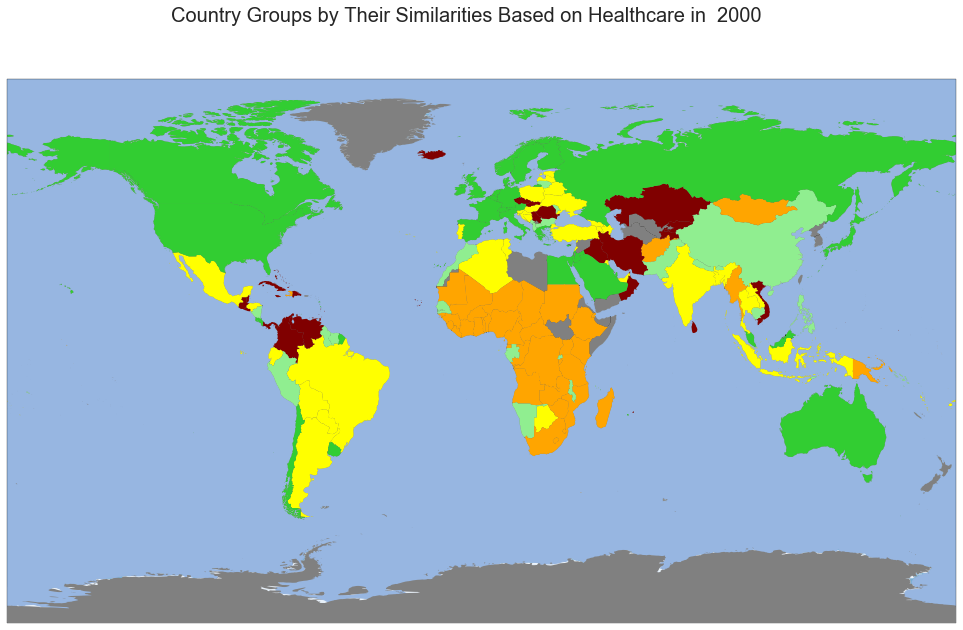

In [453]:
#Country Groups Visualization on Health

import cartopy.crs as ccrs
import cartopy as cartopy
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import matplotlib as mpl
import pysal as pysal
from matplotlib.colors import Normalize

ax = plt.axes(projection=ccrs.PlateCarree())
fig= plt.gcf()
fig.set_size_inches(17,10)
ax.stock_img()
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax.set_aspect('auto', adjustable=None)

shpfilename = shpreader.natural_earth(resolution='50m',category='cultural',name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()

for country in countries:
    ax.add_geometries(country.geometry, ccrs.PlateCarree(),facecolor='gray',label=country.attributes['adm0_a3'])

countries = reader.records()
for country in countries:
    for i in range(len(data2000)):
        if(country.attributes['adm0_a3']==data2013.ix[i,1]):
            if(data2000.loc[i]['Ranking Group']==0):
                ax.add_geometries(country.geometry, ccrs.PlateCarree(),facecolor='lightgreen',label='Group 1')
            if(data2000.loc[i]['Ranking Group']==1):
                ax.add_geometries(country.geometry, ccrs.PlateCarree(),facecolor='maroon',label='Group 2')
            if(data2000.loc[i]['Ranking Group']==2):
                ax.add_geometries(country.geometry, ccrs.PlateCarree(),facecolor='orange',label='Group 3')
            if(data2000.loc[i]['Ranking Group']==3):
                ax.add_geometries(country.geometry, ccrs.PlateCarree(),facecolor='yellow',label='Group 4')
            if(data2000.loc[i]['Ranking Group']==4):
                ax.add_geometries(country.geometry, ccrs.PlateCarree(),facecolor='limegreen',label='Group 5')
            break;
            
fig.suptitle('Country Groups by Their Similarities Based on Healthcare in  2000', fontsize=20)

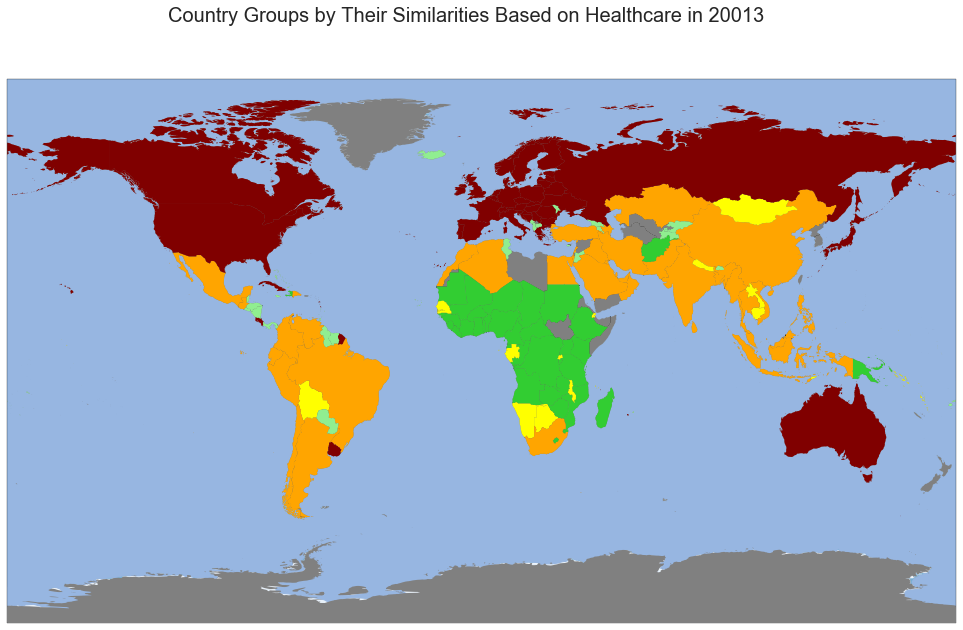

In [454]:
ax = plt.axes(projection=ccrs.PlateCarree())
fig= plt.gcf()
fig.set_size_inches(17,10)
ax.stock_img()
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax.set_aspect('auto', adjustable=None)

shpfilename = shpreader.natural_earth(resolution='50m',category='cultural',name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()

for country in countries:
    ax.add_geometries(country.geometry, ccrs.PlateCarree(),facecolor='gray',label=country.attributes['adm0_a3'])

countries = reader.records()
for country in countries:
    for i in range(len(data2013)):
        if(country.attributes['adm0_a3']==data2013.ix[i,1]):
            if(data2013.loc[i]['Ranking Group']==0):
                ax.add_geometries(country.geometry, ccrs.PlateCarree(),facecolor='limegreen',label='Group 1')
            if(data2013.loc[i]['Ranking Group']==1):
                ax.add_geometries(country.geometry, ccrs.PlateCarree(),facecolor='maroon',label='Group 2')
            if(data2013.loc[i]['Ranking Group']==2):
                ax.add_geometries(country.geometry, ccrs.PlateCarree(),facecolor='yellow',label='Group 3')
            if(data2013.loc[i]['Ranking Group']==3):
                ax.add_geometries(country.geometry, ccrs.PlateCarree(),facecolor='orange',label='Group 4')
            if(data2013.loc[i]['Ranking Group']==4):
                ax.add_geometries(country.geometry, ccrs.PlateCarree(),facecolor='lightgreen',label='Group 5')
            break;
            
fig.suptitle('Country Groups by Their Similarities Based on Healthcare in 20013', fontsize=20)

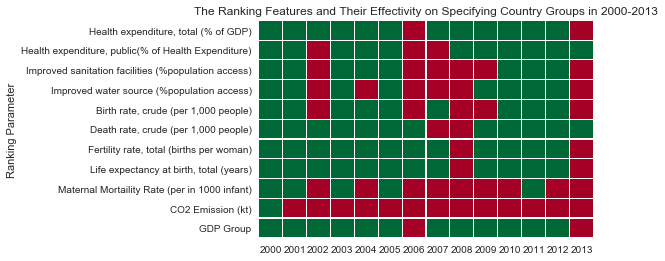

In [421]:
#Feature Selection by Years

Features= ['Years']+Parameters[1:]
ImportantFeatures = pd.DataFrame(columns=[ParameterColumns])
ImportantFeatures['Ranking Parameter']=Features[1:-2]
ImportantFeatures=ImportantFeatures.set_index(ImportantFeatures.ix[:,0])

regr = linear_model.LinearRegression()

X= data2000.ix[:,3:-2]
y= data2000['Ranking Group']
rfecv = RFECV(estimator=regr, step=1, cv=20, scoring='r2')
rfecv.fit(X, y)
ImportantFeatures.ix[:,1]=np.transpose(rfecv.support_)

X= data2001.ix[:,3:-2]
y= data2001['Ranking Group']
rfecv = RFECV(estimator=regr, step=1, cv=20, scoring='r2')
rfecv.fit(X, y)
ImportantFeatures.ix[:,2]=np.transpose(rfecv.support_)

X= data2002.ix[:,3:-2]
y= data2002['Ranking Group']
rfecv = RFECV(estimator=regr, step=1, cv=20, scoring='r2')
rfecv.fit(X, y)
ImportantFeatures.ix[:,3]=np.transpose(rfecv.support_)

X= data2003.ix[:,3:-2]
y= data2003['Ranking Group']
rfecv = RFECV(estimator=regr, step=1, cv=20, scoring='r2')
rfecv.fit(X, y)
ImportantFeatures.ix[:,4]=np.transpose(rfecv.support_)

X= data2004.ix[:,3:-2]
y= data2004['Ranking Group']
rfecv = RFECV(estimator=regr, step=1, cv=20, scoring='r2')
rfecv.fit(X, y)
ImportantFeatures.ix[:,5]=np.transpose(rfecv.support_)

X= data2005.ix[:,3:-2]
y= data2005['Ranking Group']
rfecv = RFECV(estimator=regr, step=1, cv=20, scoring='r2')
rfecv.fit(X, y)
ImportantFeatures.ix[:,6]=np.transpose(rfecv.support_)

X= data2006.ix[:,3:-2]
y= data2006['Ranking Group']
rfecv = RFECV(estimator=regr, step=1, cv=20, scoring='r2')
rfecv.fit(X, y)
ImportantFeatures.ix[:,7]=np.transpose(rfecv.support_)

X= data2007.ix[:,3:-2]
y= data2007['Ranking Group']
rfecv = RFECV(estimator=regr, step=1, cv=20, scoring='r2')
rfecv.fit(X, y)
ImportantFeatures.ix[:,8]=np.transpose(rfecv.support_)

X= data2008.ix[:,3:-2]
y= data2008['Ranking Group']
rfecv = RFECV(estimator=regr, step=1, cv=20, scoring='r2')
rfecv.fit(X, y)
ImportantFeatures.ix[:,9]=np.transpose(rfecv.support_)

X= data2009.ix[:,3:-2]
y= data2009['Ranking Group']
rfecv = RFECV(estimator=regr, step=1, cv=20, scoring='r2')
rfecv.fit(X, y)
ImportantFeatures.ix[:,10]=np.transpose(rfecv.support_)

X= data2010.ix[:,3:-2]
y= data2010['Ranking Group']
rfecv = RFECV(estimator=regr, step=1, cv=20, scoring='r2')
rfecv.fit(X, y)
ImportantFeatures.ix[:,11]=np.transpose(rfecv.support_)

X= data2011.ix[:,3:-2]
y= data2011['Ranking Group']
rfecv = RFECV(estimator=regr, step=1, cv=20, scoring='r2')
rfecv.fit(X, y)
ImportantFeatures.ix[:,12]=np.transpose(rfecv.support_)

X= data2012.ix[:,3:-2]
y= data2012['Ranking Group']
rfecv = RFECV(estimator=regr, step=1, cv=20, scoring='r2')
rfecv.fit(X, y)
ImportantFeatures.ix[:,13]=np.transpose(rfecv.support_)

X= data2013.ix[:,3:-2]
y= data2013['Ranking Group']
rfecv = RFECV(estimator=regr, step=1, cv=20, scoring='r2')
rfecv.fit(X, y)
ImportantFeatures.ix[:,14]=np.transpose(rfecv.support_)

ImportantFeatures.ix[:,1:]=ImportantFeatures.ix[:,1:].astype(int)

ax = plt.axes()
seaborn.heatmap(ImportantFeatures.ix[:,1:], annot=False, fmt="d", linewidths=.1, cmap='RdYlGn',cbar=False, ax=ax)
ax.set_title('The Ranking Features and Their Effectivity on Specifying Country Groups in 2000-2013')

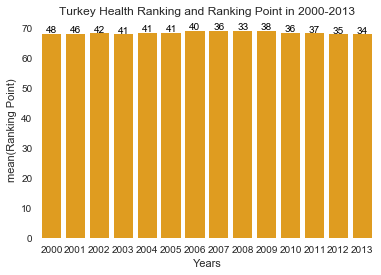

In [423]:
TurkeyDataTranspose= TurkeyData.transpose()
TurkeyDataTranspose= TurkeyDataTranspose.drop(TurkeyDataTranspose.index[[0]])
TurkeyDataTranspose.columns=TurkeyData.ix[:,0]
TurkeyDataTranspose['Years']=list(TurkeyData)[1:]

TurkeyDataTranspose

ax = seaborn.barplot(x="Years", y="Ranking Point", data=TurkeyDataTranspose,color="orange")
ax.set_facecolor("white")
index=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + .5,
            '{:1.0f}'.format(list(TurkeyDataTranspose.ix[:,13])[index]),
            ha="center",
            color='black')
    index+=1
ax.set_title('Turkey Health Ranking and Ranking Point in 2000-2013')

In [299]:
#G20 Countries Performances
data=[]

for i in range(len(G20Ranking)):
    data.append(go.Scatter(x = list(G20Ranking)[2:] ,y=G20Ranking.ix[i,2:],mode = 'lines+markers',name = G20Ranking.ix[i,0]))

layout = dict(title = 'G20 Countries Health Ranking by Their Performances in Between 2000 - 2013',
              xaxis = dict(title = 'Years'),
              yaxis = dict(title = 'World Ranking'))

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

In [300]:
#Turkey Performance through 2000-2013

#Turkey GDP
TurkeyGDPData=go.Scatter(x = list(TurkeyData)[:] ,y=TurkeyData.ix[0,:],mode = 'lines+markers',name = 'Turkey')
G20GDPAverage=go.Scatter(x = list(TurkeyData)[:] ,y=G20AverageData.ix[0,:],line = dict(dash = 'dot'),mode = 'lines+markers',name = 'G20 Average')
OECDGDPAverage=go.Scatter(x = list(TurkeyData)[:] ,y=OECDAverageData.ix[0,:],line = dict(dash = 'dot'),mode = 'lines+markers',name = 'OECD Average')

layout = dict(title = 'Turkey GDP (In USA Dollar) in 2000 - 2013',
              xaxis = dict(title = 'Years'),
              yaxis = dict(title = 'GDP'))

fig = dict(data=[TurkeyGDPData,G20GDPAverage,OECDGDPAverage], layout=layout)
py.iplot(fig, filename='styled-line')

In [301]:
#Turkey Health Expenditure(Total)
TurkeyHETotal=go.Scatter(x = list(TurkeyData)[:] ,y=TurkeyData.ix[1,:],mode = 'lines+markers',name = 'Turkey')
G20HETotalAverage=go.Scatter(x = list(TurkeyData)[:] ,y=G20AverageData.ix[1,:],line = dict(dash = 'dot'),mode = 'lines+markers',name = 'G20 Average')
OECDHETotalAverage=go.Scatter(x = list(TurkeyData)[:] ,y=OECDAverageData.ix[1,:],line = dict(dash = 'dot'),mode = 'lines+markers',name = 'OECD Average')

layout = dict(title = 'Turkey Health Expenditure, Total (% of GDP) in 2000 - 2013',
              xaxis = dict(title = 'Years'),
              yaxis = dict(title = 'Health Expenditure, Total (% of GDP)'))

fig = dict(data=[TurkeyHETotal,G20HETotalAverage,OECDHETotalAverage], layout=layout)
py.iplot(fig, filename='styled-line')

In [302]:
#Turkey Health Expenditure(Public)
TurkeyHEPublic=go.Scatter(x = list(TurkeyData)[:] ,y=TurkeyData.ix[2,:],mode = 'lines+markers',name = 'Turkey')
G20HEPublicAverage=go.Scatter(x = list(TurkeyData)[:] ,y=G20AverageData.ix[2,:],line = dict(dash = 'dot'),mode = 'lines+markers',name = 'G20 Average')
OECDHEPublicAverage=go.Scatter(x = list(TurkeyData)[:] ,y=OECDAverageData.ix[2,:],line = dict(dash = 'dot'),mode = 'lines+markers',name = 'OECD Average')

layout = dict(title = 'Turkey Health Expenditure, Public (% of Health Expenditure) in 2000 - 2013',
              xaxis = dict(title = 'Years'),
              yaxis = dict(title = '% Public Health Expenditure'))

fig = dict(data=[TurkeyHEPublic,G20HEPublicAverage,OECDHEPublicAverage], layout=layout)
py.iplot(fig, filename='styled-line')

In [248]:
#Turkey Improved Sanitation(% Public Access)
TurkeyIS=go.Scatter(x = list(TurkeyData)[:] ,y=TurkeyData.ix[3,:],mode = 'lines+markers',name = 'Turkey')
G20ISAverage=go.Scatter(x = list(TurkeyData)[:] ,y=G20AverageData.ix[3,:],line = dict(dash = 'dot'),mode = 'lines+markers',name = 'G20 Average')
OECDISAverage=go.Scatter(x = list(TurkeyData)[:] ,y=OECDAverageData.ix[3,:],line = dict(dash = 'dot'),mode = 'lines+markers',name = 'OECD Average')

layout = dict(title = 'Turkey Improved sanitation facilities (%population access) in 2000 - 2013',
              xaxis = dict(title = 'Years'),
              yaxis = dict(title = 'Improved sanitation facilities (%population access)'))

fig = dict(data=[TurkeyIS,G20ISAverage,OECDISAverage], layout=layout)
py.iplot(fig, filename='styled-line')

In [249]:
#Turkey Improved water Source (%population access)
TurkeyIWS=go.Scatter(x = list(TurkeyData)[:] ,y=TurkeyData.ix[4,:],mode = 'lines+markers',name = 'Turkey')
G20IWSAverage=go.Scatter(x = list(TurkeyData)[:] ,y=G20AverageData.ix[4,:],line = dict(dash = 'dot'),mode = 'lines+markers',name = 'G20 Average')
OECDIWSAverage=go.Scatter(x = list(TurkeyData)[:] ,y=OECDAverageData.ix[4,:],line = dict(dash = 'dot'),mode = 'lines+markers',name = 'OECD Average')

layout = dict(title = 'Turkey Improved Water Source (%Population Access) in 2000 - 2013',
              xaxis = dict(title = 'Years'),
              yaxis = dict(title = 'Improved Water Source (%Population Access)'))

fig = dict(data=[TurkeyIWS,G20IWSAverage,OECDIWSAverage], layout=layout)
py.iplot(fig, filename='styled-line')

In [250]:
#Turkey Birth rate, crude (per 1,000 people)
TurkeyBR=go.Scatter(x = list(TurkeyData)[:] ,y=TurkeyData.ix[5,:],mode = 'lines+markers',name = 'Turkey')
G20BRAverage=go.Scatter(x = list(TurkeyData)[:] ,y=G20AverageData.ix[5,:],line = dict(dash = 'dot'),mode = 'lines+markers',name = 'G20 Average')
OECDBRAverage=go.Scatter(x = list(TurkeyData)[:] ,y=OECDAverageData.ix[5,:],line = dict(dash = 'dot'),mode = 'lines+markers',name = 'OECD Average')

layout = dict(title = 'Turkey Birth Rate, Crude (Per 1,000 People) in 2000 - 2013',
              xaxis = dict(title = 'Years'),
              yaxis = dict(title = 'Birth Rate, Crude (Per 1,000 People)'))

fig = dict(data=[TurkeyBR,G20BRAverage,OECDBRAverage], layout=layout)
py.iplot(fig, filename='styled-line')

In [251]:
#Turkey Death rate, crude (per 1,000 people)
TurkeyDR=go.Scatter(x = list(TurkeyData)[:] ,y=TurkeyData.ix[6,:],mode = 'lines+markers',name = 'Turkey')
G20DRAverage=go.Scatter(x = list(TurkeyData)[:] ,y=G20AverageData.ix[6,:],line = dict(dash = 'dot'),mode = 'lines+markers',name = 'G20 Average')
OECDDRAverage=go.Scatter(x = list(TurkeyData)[:] ,y=OECDAverageData.ix[6,:],line = dict(dash = 'dot'),mode = 'lines+markers',name = 'OECD Average')

layout = dict(title = 'Turkey Death Rate, Crude (Per 1,000 People) in 2000 - 2013',
              xaxis = dict(title = 'Years'),
              yaxis = dict(title = 'Death Rate, Crude (Per 1,000 People)'))

fig = dict(data=[TurkeyDR,G20DRAverage,OECDDRAverage], layout=layout)
py.iplot(fig, filename='styled-line')

In [252]:
#Turkey Fertility Rate, Total (births per woman)
TurkeyFR=go.Scatter(x = list(TurkeyData)[:] ,y=TurkeyData.ix[7,:],mode = 'lines+markers',name = 'Turkey')
G20FRAverage=go.Scatter(x = list(TurkeyData)[:] ,y=G20AverageData.ix[7,:],line = dict(dash = 'dot'),mode = 'lines+markers',name = 'G20 Average')
OECDFRAverage=go.Scatter(x = list(TurkeyData)[:] ,y=OECDAverageData.ix[7,:],line = dict(dash = 'dot'),mode = 'lines+markers',name = 'OECD Average')

layout = dict(title = 'Turkey Fertility Rate, Total (Births per Woman) in 2000 - 2013',
              xaxis = dict(title = 'Years'),
              yaxis = dict(title = 'Fertility Rate, Total (Births per Woman)'))

fig = dict(data=[TurkeyFR,G20FRAverage,OECDFRAverage], layout=layout)
py.iplot(fig, filename='styled-line')

In [253]:
#Turkey Life Expectancy at Birth, Total (Years)
TurkeyLE=go.Scatter(x = list(TurkeyData)[:] ,y=TurkeyData.ix[8,:],mode = 'lines+markers',name = 'Turkey')
G20LEAverage=go.Scatter(x = list(TurkeyData)[:] ,y=G20AverageData.ix[8,:],line = dict(dash = 'dot'),mode = 'lines+markers',name = 'G20 Average')
OECDLEAverage=go.Scatter(x = list(TurkeyData)[:] ,y=OECDAverageData.ix[8,:],line = dict(dash = 'dot'),mode = 'lines+markers',name = 'OECD Average')

layout = dict(title = 'Turkey Life Expectancy at Birth, Total (Years) in 2000 - 2013',
              xaxis = dict(title = 'Years'),
              yaxis = dict(title = 'Life Expectancy at Birth, Total (Years)'))

fig = dict(data=[TurkeyLE,G20LEAverage,OECDLEAverage], layout=layout)
py.iplot(fig, filename='styled-line')

In [254]:
#Turkey Maternal Mortaility Rate (Per in 1000 Infant)
TurkeyMM=go.Scatter(x = list(TurkeyData)[:] ,y=TurkeyData.ix[9,:],mode = 'lines+markers',name = 'Turkey')
G20MMAverage=go.Scatter(x = list(TurkeyData)[:] ,y=G20AverageData.ix[9,:],line = dict(dash = 'dot'),mode = 'lines+markers',name = 'G20 Average')
OECDMMAverage=go.Scatter(x = list(TurkeyData)[:] ,y=OECDAverageData.ix[9,:],line = dict(dash = 'dot'),mode = 'lines+markers',name = 'OECD Average')

layout = dict(title = 'Turkey Maternal Mortaility Rate (Per in 1000 Infant) in 2000 - 2013',
              xaxis = dict(title = 'Years'),
              yaxis = dict(title = 'Maternal Mortaility Rate (Per in 1000 Infant)'))

fig = dict(data=[TurkeyMM,G20MMAverage,OECDMMAverage], layout=layout)
py.iplot(fig, filename='styled-line')

In [255]:
#Turkey CO2 Emission (kt)
TurkeyC02=go.Scatter(x = list(TurkeyData)[:] ,y=TurkeyData.ix[10,:],mode = 'lines+markers',name = 'Turkey')
G20C02Average=go.Scatter(x = list(TurkeyData)[:] ,y=G20AverageData.ix[10,:],line = dict(dash = 'dot'),mode = 'lines+markers',name = 'G20 Average')
OECDC02Average=go.Scatter(x = list(TurkeyData)[:] ,y=OECDAverageData.ix[10,:],line = dict(dash = 'dot'),mode = 'lines+markers',name = 'OECD Average')

layout = dict(title = 'Turkey CO2 Emission (kt) in 2000 - 2013',
              xaxis = dict(title = 'Years'),
              yaxis = dict(title = 'CO2 Emission (kt)'))

fig = dict(data=[TurkeyC02,G20C02Average,OECDC02Average], layout=layout)
py.iplot(fig, filename='styled-line')

In [424]:
import plotly.plotly as py
import pandas as pd

data = [ dict(
        type = 'choropleth',
        locations = data2000['Country Code'],
        z = data2000['Ranking Point'],
        text = data2000['Country Name'],
        colorscale = [[0,"rgb(245,245,220)"],[0.3,"rgb(255,211,155)"],[0.5,"rgb(255,64,64)"],
            [0.6,"rgb(238,59,59)"],[0.8,"rgb(205,51,51)"],[1,"rgb(139,35,35)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            #tickprefix = '$',
            title = 'Ranking Points'),
      ) ]

layout = dict(
    title = 'Countries Health Ranking Points by Their Performance in 2000',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

In [425]:
data = [ dict(
        type = 'choropleth',
        locations = data2013['Country Code'],
        z = data2013['Ranking Point'],
        text = data2013['Country Name'],
        colorscale = [[0,"rgb(245,245,220)"],[0.3,"rgb(255,211,155)"],[0.5,"rgb(255,64,64)"],
            [0.6,"rgb(238,59,59)"],[0.8,"rgb(205,51,51)"],[1,"rgb(139,35,35)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            #tickprefix = '$',
            title = 'Ranking Points'),
      ) ]

layout = dict(
    title = 'Countries Health Ranking Points by Their Performance in 2013',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

In [426]:
from sklearn.model_selection import cross_val_score
regr = linear_model.LinearRegression()

TurkeyDataTr= TurkeyData.transpose()
TurkeyDataTr= TurkeyDataTr.drop(TurkeyDataTr.index[[0]])
TurkeyDataTr.columns=TurkeyData.ix[:,0]
TurkeyDataTr['Years']=list(TurkeyData)[1:]
TurkeyDataTr.index=range(0,len(TurkeyDataTr))
TurkeyDataTr.columns=['GDP','HET','HEP','ISF','IWS','BR','DR','FR','LE','MM','CO2','GDPGROUP','RANKINGPOINT','RANKING','YEARS']
TurkeyDataTr = TurkeyDataTr.astype(float)

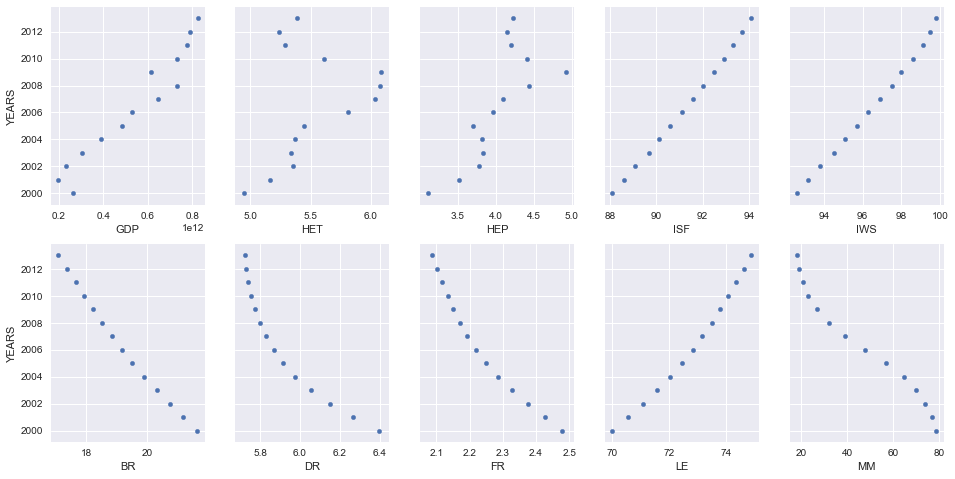

In [427]:
fig, axs = plt.subplots(2, 5, sharey=True)
TurkeyDataTr.plot(kind='scatter', x='GDP', y='YEARS', ax=axs[0,0], figsize=(16, 8))
TurkeyDataTr.plot(kind='scatter', x='HET', y='YEARS', ax=axs[0,1])
TurkeyDataTr.plot(kind='scatter', x='HEP', y='YEARS', ax=axs[0,2])
TurkeyDataTr.plot(kind='scatter', x='ISF', y='YEARS', ax=axs[0,3])
TurkeyDataTr.plot(kind='scatter', x='IWS', y='YEARS', ax=axs[0,4])
TurkeyDataTr.plot(kind='scatter', x='BR', y='YEARS', ax=axs[1,0])
TurkeyDataTr.plot(kind='scatter', x='DR', y='YEARS', ax=axs[1,1])
TurkeyDataTr.plot(kind='scatter', x='FR', y='YEARS', ax=axs[1,2])
TurkeyDataTr.plot(kind='scatter', x='LE', y='YEARS', ax=axs[1,3])
TurkeyDataTr.plot(kind='scatter', x='MM', y='YEARS', ax=axs[1,4])

In [464]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='GDP ~ YEARS', data=TurkeyDataTr).fit()
prediction2023 = pd.DataFrame({'YEARS': [2023]})
Turkey2023 = pd.DataFrame({'GDP': lm.predict(prediction2023)})

lm = smf.ols(formula='HET ~ YEARS', data=TurkeyDataTr).fit()
prediction2023 = pd.DataFrame({'YEARS': [2023]})
Turkey2023['HET']=lm.predict(prediction2023)

lm = smf.ols(formula='HEP ~ YEARS', data=TurkeyDataTr).fit()
prediction2023 = pd.DataFrame({'YEARS': [2023]})
Turkey2023['HEP']=lm.predict(prediction2023)

lm = smf.ols(formula='ISF ~ YEARS', data=TurkeyDataTr).fit()
prediction2023 = pd.DataFrame({'YEARS': [2023]})
Turkey2023['ISF']=lm.predict(prediction2023)

lm = smf.ols(formula='IWS ~ YEARS', data=TurkeyDataTr).fit()
prediction2023 = pd.DataFrame({'YEARS': [2023]})
Turkey2023['IWS']=lm.predict(prediction2023)

lm = smf.ols(formula='BR ~ YEARS', data=TurkeyDataTr).fit()
prediction2023 = pd.DataFrame({'YEARS': [2023]})
Turkey2023['BR']=lm.predict(prediction2023)

lm = smf.ols(formula='DR ~ YEARS', data=TurkeyDataTr).fit()
prediction2023 = pd.DataFrame({'YEARS': [2023]})
Turkey2023['DR']=lm.predict(prediction2023)

lm = smf.ols(formula='FR ~ YEARS', data=TurkeyDataTr).fit()
prediction2023 = pd.DataFrame({'YEARS': [2023]})
Turkey2023['FR']=lm.predict(prediction2023)

lm = smf.ols(formula='LE ~ YEARS', data=TurkeyDataTr).fit()
prediction2023 = pd.DataFrame({'YEARS': [2023]})
Turkey2023['LE']=lm.predict(prediction2023)

lm = smf.ols(formula='MM ~ YEARS', data=TurkeyDataTr).fit()
prediction2023 = pd.DataFrame({'YEARS': [2013]})
Turkey2023['MM']=lm.predict(prediction2023)

lm = smf.ols(formula='RANKINGPOINT ~ GDP+HET+HEP+ISF+BR+IWS+DR+FR+LE+MM', data=TurkeyDataTr).fit()
Turkey2023RankinPoint=lm.predict(Turkey2023)

In [261]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           RANKINGPOINT   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     32.50
Date:                Mon, 15 May 2017   Prob (F-statistic):           0.000678
Time:                        18:06:09   Log-Likelihood:                -10.286
No. Observations:                  14   AIC:                             38.57
Df Residuals:                       5   BIC:                             44.32
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     23.2455      8.094      2.872      0.0

C:\Users\SAMSUNG\Anaconda3\lib\site-packages\scipy\stats\stats.py:1327: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=14



In [465]:
lm = smf.ols(formula='RANKING ~ RANKINGPOINT', data=TurkeyDataTr).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                RANKING   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     1.640
Date:                Mon, 15 May 2017   Prob (F-statistic):              0.225
Time:                        21:19:35   Log-Likelihood:                -39.193
No. Observations:                  14   AIC:                             82.39
Df Residuals:                      12   BIC:                             83.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      269.9886    180.254      1.498   

C:\Users\SAMSUNG\Anaconda3\lib\site-packages\scipy\stats\stats.py:1327: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=14



In [466]:
prediction2023 = pd.DataFrame({'RANKINGPOINT': Turkey2023RankinPoint})
lm.predict(prediction2023)

array([ 22.5713741])

In [456]:
WorldRankingData = pd.DataFrame({'Country Name': data2013.ix[:,0]})
data2000['2000 Ranking']=data2000.ix[:,['Ranking Point']]
data2001['2001 Ranking']=data2001.ix[:,['Ranking Point']]
data2002['2002 Ranking']=data2002.ix[:,['Ranking Point']]
data2003['2003 Ranking']=data2003.ix[:,['Ranking Point']]
data2004['2004 Ranking']=data2004.ix[:,['Ranking Point']]
data2005['2005 Ranking']=data2005.ix[:,['Ranking Point']]
data2006['2006 Ranking']=data2006.ix[:,['Ranking Point']]
data2007['2007 Ranking']=data2007.ix[:,['Ranking Point']]
data2008['2008 Ranking']=data2008.ix[:,['Ranking Point']]
data2009['2009 Ranking']=data2009.ix[:,['Ranking Point']]
data2010['2010 Ranking']=data2010.ix[:,['Ranking Point']]
data2011['2011 Ranking']=data2011.ix[:,['Ranking Point']]
data2012['2012 Ranking']=data2012.ix[:,['Ranking Point']]
data2013['2013 Ranking']=data2013.ix[:,['Ranking Point']]
WorldRankingData=WorldRankingData.merge(data2013.ix[:,['Country Name','2013 Ranking']], left_on='Country Name', right_on='Country Name',how='outer')
WorldRankingData=WorldRankingData.merge(data2012.ix[:,['Country Name','2012 Ranking']], left_on='Country Name', right_on='Country Name',how='outer')
WorldRankingData=WorldRankingData.merge(data2011.ix[:,['Country Name','2011 Ranking']], left_on='Country Name', right_on='Country Name',how='outer')
WorldRankingData=WorldRankingData.merge(data2010.ix[:,['Country Name','2010 Ranking']], left_on='Country Name', right_on='Country Name',how='outer')
WorldRankingData=WorldRankingData.merge(data2009.ix[:,['Country Name','2009 Ranking']], left_on='Country Name', right_on='Country Name',how='outer')
WorldRankingData=WorldRankingData.merge(data2008.ix[:,['Country Name','2008 Ranking']], left_on='Country Name', right_on='Country Name',how='outer')
WorldRankingData=WorldRankingData.merge(data2007.ix[:,['Country Name','2007 Ranking']], left_on='Country Name', right_on='Country Name',how='outer')
WorldRankingData=WorldRankingData.merge(data2006.ix[:,['Country Name','2006 Ranking']], left_on='Country Name', right_on='Country Name',how='outer')
WorldRankingData=WorldRankingData.merge(data2005.ix[:,['Country Name','2005 Ranking']], left_on='Country Name', right_on='Country Name',how='outer')

WorldRankingData=WorldRankingData.merge(data2004.ix[:,['Country Name','2004 Ranking']], left_on='Country Name', right_on='Country Name',how='outer')
WorldRankingData=WorldRankingData.merge(data2003.ix[:,['Country Name','2003 Ranking']], left_on='Country Name', right_on='Country Name',how='outer')
WorldRankingData=WorldRankingData.merge(data2002.ix[:,['Country Name','2002 Ranking']], left_on='Country Name', right_on='Country Name',how='outer')
WorldRankingData=WorldRankingData.merge(data2001.ix[:,['Country Name','2001 Ranking']], left_on='Country Name', right_on='Country Name',how='outer')
WorldRankingData=WorldRankingData.merge(data2000.ix[:,['Country Name','2000 Ranking']], left_on='Country Name', right_on='Country Name',how='outer')
WorldRankingData

,Country Name,2013 Ranking,2012 Ranking,2011 Ranking,2010 Ranking,2009 Ranking,2008 Ranking,2007 Ranking,2006 Ranking,2005 Ranking,2004 Ranking,2003 Ranking,2002 Ranking,2001 Ranking,2000 Ranking
0,France,78.522556,78.837325,78.990032,78.591521,78.877198,78.860604,79.391532,80.072633,79.880603,80.924688,80.381675,81.953165,82.287451,83.060518
1,Sweden,77.662898,77.747489,77.788755,74.879091,75.592287,75.371867,75.986659,75.932728,76.026845,76.947275,77.446626,78.267539,78.487698,78.579615
2,Netherlands,77.213260,77.648175,77.288219,76.995442,77.116047,76.844857,77.085572,77.441536,76.486603,75.396236,75.394758,75.810739,75.887224,76.146120
3,United States,77.092853,77.679354,77.545617,77.362592,77.440695,76.786397,76.633920,76.737328,76.068494,76.997422,77.235752,77.953004,77.952281,77.711063
4,Switzerland,76.813421,76.978401,76.839053,76.342862,76.472629,77.209790,76.315627,77.582073,78.253693,79.009943,78.902672,79.618959,79.900592,79.915068
5,Canada,76.586573,77.163017,77.311543,77.514305,77.723797,77.041661,77.927711,78.212580,78.078294,78.687634,78.945396,79.838805,80.256617,80.404064
6,Australia,76.126350,76.460086,76.542286,76.246101,76.489817,76.762314,76.929457,77.176974,77.161765,77.571171,77.337089,78.340318,78.703268,79.251017
7,Japan,75.800594,76.169510,75.902757,75.671112,76.141224,75.576148,75.769305,76.168359,76.052553,76.862639,76.916280,78.048296,78.870756,79.247398
8,Israel,75.668140,75.714884,75.654210,75.721445,75.694702,75.836055,75.892098,76.434271,76.159815,76.585334,76.676430,77.947867,78.694626,78.600346
9,Norway,75.090175,75.007461,75.063795,75.125439,75.600314,74.960016,75.444495,75.839541,76.443774,77.916015,78.656712,79.130491,78.477835,78.724142


In [460]:
#ranking2013=ranking2013.merge(data2013.ix[:,['Country Name','Ranking Point']], left_on='Country Name', right_on='Country Name',how='outer')
ranking2013=ranking2013.sort_values(by='Ranking Point_y', ascending=False)
ranking2013.index=range(len(ranking2013))
ranking2013

,Country Name,Country Code,GDP,"Health expenditure, total (% of GDP)","Health expenditure, public(% of Health Expenditure)",Improved sanitation facilities (%population access),Improved water source (%population access),"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Fertility rate, total (births per woman)","Life expectancy at birth, total (years)",Maternal Mortaility Rate (per in 1000 infant),CO2 Emission (kt),GDP Group,Ranking Point_x,Ranking Point_y
0,France,FRA,2.808511e+12,6.580965,7.181425,14.790997,10.000000,0.538780,4.659167,0.621794,19.353121,9.958819,4.837489,1.000000,0,78.522556
1,Sweden,SWE,5.787420e+11,6.121047,7.330819,14.887460,10.000000,0.466943,4.141070,0.544070,19.199946,9.993137,4.978406,0.894737,0,77.662898
2,Netherlands,NLD,8.666800e+11,5.921811,7.396790,14.646302,10.000000,0.275377,4.881208,0.380849,18.821264,9.972546,4.917112,0.947368,0,77.213260
3,United States,USA,1.669152e+13,10.000000,6.413945,15.000000,9.866889,0.538780,5.029235,0.518809,17.330648,9.924502,2.470044,1.000000,0,77.092853
4,Switzerland,CHE,6.848350e+11,5.972557,5.491938,14.983923,10.000000,0.275377,5.177263,0.256490,19.689254,9.986273,4.980347,0.894737,0,76.813421
5,Canada,CAN,1.842628e+12,5.691386,5.682172,14.967846,9.966722,0.371160,5.769373,0.308565,19.088852,9.972546,4.767951,0.947368,0,76.586573
6,Australia,AUS,1.563951e+12,4.901600,4.589681,15.000000,10.000000,0.646536,6.361483,0.519975,19.311991,9.979410,4.815675,0.947368,0,76.126350
7,Japan,JPN,5.155717e+12,5.739948,6.842339,15.000000,10.000000,0.035919,3.622974,0.186538,20.000000,9.979410,4.393466,1.000000,0,75.800594
8,Israel,ISR,2.933148e+11,3.341389,2.832883,15.000000,10.000000,1.604368,7.249648,1.430126,19.258096,9.986273,4.965358,0.789474,0,75.668140
9,Norway,NOR,5.227462e+11,4.645414,5.707387,14.694534,10.000000,0.442997,5.103249,0.458573,19.080810,9.986273,4.970938,0.894737,0,75.090175


In [463]:
x=ranking2013.ix[0:20,0]

trace1 = {
  'x': x,'y': ranking2013.ix[0:20,3],'name': 'Health expenditure, total (% of GDP)','type': 'bar'
};
trace2 = {
  'x': x,'y': ranking2013.ix[0:20,4],'name': 'Health expenditure, public(% of Health Expenditure)','type': 'bar'
};
trace3 = {
  'x': x,'y': ranking2013.ix[0:20,5],'name': 'Improved sanitation facilities (%population access)','type': 'bar'
} 
trace4 = {
  'x': x,'y': ranking2013.ix[0:20,6],'name': 'Improved water source (%population access)','type': 'bar'
}
trace5 = {
  'x': x,'y': ranking2013.ix[0:20,7],'name': 'Birth rate, crude (per 1,000 people)','type': 'bar'
}
trace6 = {
  'x': x,'y': ranking2013.ix[0:20,8],'name': 'Death rate, crude (per 1,000 people)','type': 'bar'
}
trace7 = {
  'x': x,'y': ranking2013.ix[0:20,9],'name': 'Fertility rate, total (births per woman)','type': 'bar'
}
trace8 = {
  'x': x,'y': ranking2013.ix[0:20,10],'name': 'Life expectancy at birth, total (years)','type': 'bar'
}
trace9 = {
  'x': x,'y': ranking2013.ix[0:20,11],'name': 'Maternal Mortaility Rate (per in 1000 infant)','type': 'bar'
}
trace10 = {
  'x': x,'y': ranking2013.ix[0:20,12],'name': 'CO2 Emission (kt)','type': 'bar'
}
 
data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10];
layout = {
  'xaxis': {'title': 'Country Ranking Point Nominal'},
  'yaxis': {'title': 'Countries'},
  'barmode': 'relative',
  'title': '2013 Country Healtcare Ranking Top 20'
};
py.iplot({'data': data, 'layout': layout}, filename='barmode-relative')